# Wikipedia

**Описание:**

Проведение анализа активности пользователей, выявление их предпочтений и сегментация пользователей на основе имеющихся данных о разной степени детализации участия пользователей в голосованиях в арбитражный комитет Wikipedia.org, а также статистики по пользователям о том, сколько они совершили правок и действий разного типа.


**Цель проекта:**

 - Исследование голосующей аудитории проекта. 
 - Разделение пользователей на сегменты и изучение данных в
     разрезе сегментов.



**Описание данных:**

 В таблице `stats` содержится информация о пользователях.


 - `Edits` - количество правок за месяц;

 - `Reverts` - Количество отмен чужих правок; пользователь может отменять чужие правки в своих статьях; Reverts-отмены чужих правок в своих статьях

 - `Log` - количество иных действий; пользователь может не только править или писать, но и патрулировать, вносить в баны, защита            страниц.  

 - `Diff` - добавленное минус удалённое; Diff-что автор написал и удалил сам за месяц

 - `Volume` - общий объём добавленного; общий объем добавленного пользователем по всем направлениям; volume - объем всего, что сделал пользователь

 - `Tot size` - накопленная сумма добавленного; объем написанного 150 самыми активными( по объёму написанного) авторами за месяц

 - `Time` - время онлайн; 

 - `Speed` - скорость (количество правок в единицу времени); 

 - `User` - ник пользователя; 

 - `txt` - дата в текстовом формате;

 
 В таблице `votes` содержится информация о голосовании.


 - `voter` - голосующий; 

 - `can_vote` - проходит по критериям; 

 - `time` - время голоса; 

 - `candidate` - кандидат, по которому голос; 

 - `n` - номер выборов, с дробными частями - довыборы; 

 - `vote` - голос, 1 - за, -1 - против;

 - `lt` - суток от начала текущих выборов;
 
**Описание механики выборов:**

Выборы проводятся каждые полгода.
Побеждают кандидаты, которые набирают ⅔ голосов “за”. 
Выбирают комиссию (ареопаг), которая обладает особыми правами. 
Например решать споры о банах/разбанах пользователей или статей.


**Ход исследования:**

  - 1. Обзор данных.
    
  - 2. Предобработка данных о пользователях.
   
  - 3. Предобработка данных о голосовании.
   
  - 4. Исследование данных таблицы с пользователями.      
     
  - 5. Распределение данных таблицы с выборами.   
   
  - 6. Динамика голосования.        
 
  - 7. Выводы.

## 1. Обзор данных

In [2]:
#Импортируем библиотеки

In [3]:

import pandas as pd
import re
import gdown
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import sys
import warnings
from datetime import timedelta
import bar_chart_race as bcr

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
#Прочитаем файлы и сохраним их в переменные stats и votes

In [5]:
try:
    stats = pd.read_excel(r'C:\\Users\Пользователь\Desktop\Проекты аналитика данных\Википедия\stats.xlsx', sheet_name='Sheet1')
    votes = pd.read_excel(r'C:\\Users\Пользователь\Desktop\Проекты аналитика данных\Википедия\votes.xlsx', sheet_name='Sheet1')
except:
    !gdown -- 1_5wuZto47N-U4FTlhSJJ5P7tzhQR0m8N
    !gdown -- 1JIEtg44_4QitfAd8T2Uo4-0F5_2n12OH
    stats = pd.read_excel('https://drive.google.com/uc?id=1_5wuZto47N-U4FTlhSJJ5P7tzhQR0m8N')
    votes = pd.read_excel('https://drive.google.com/uc?id=1JIEtg44_4QitfAd8T2Uo4-0F5_2n12OH')

Downloading...
From: https://drive.google.com/uc?id=1_5wuZto47N-U4FTlhSJJ5P7tzhQR0m8N
To: /Users/drxr/stats.xlsx
100%|██████████████████████████████████████| 1.74M/1.74M [00:00<00:00, 2.95MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JIEtg44_4QitfAd8T2Uo4-0F5_2n12OH
To: /Users/drxr/votes.xlsx
100%|██████████████████████████████████████| 2.43M/2.43M [00:00<00:00, 3.37MB/s]


In [6]:
#Получим общую информацию о датафрейме stats, выведем первые 10 строк датафрейма

In [7]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Edits     28950 non-null  int64  
 1   Reverts   10157 non-null  float64
 2   Log       28306 non-null  float64
 3   Diff      28945 non-null  object 
 4   Volume    28945 non-null  object 
 5   Tot size  28945 non-null  object 
 6   Time      28950 non-null  object 
 7   Speed     28950 non-null  object 
 8   User      28950 non-null  object 
 9   txt       28950 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 2.2+ MB


In [8]:
stats.head(10)

,Edits,Reverts,Log,Diff,Volume,Tot size,Time,Speed,User,txt
0,1589,NaN,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,200708
1,1809,NaN,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,200708
2,2734,NaN,NaN,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,200708
3,2611,NaN,6.0,278 k,350 k,43 M,135 h,19/h,User№101,200708
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,200708
5,2000,NaN,259.0,443 k,614 k,36 M,125 h,18/h,Vizu,200708
6,2100,NaN,5.0,377 k,564 k,45 M,137 h,15/h,Michael Romanov,200708
7,2069,NaN,27.0,879 k,938 k,22 M,79 h,26/h,Ekamaloff,200708
8,1884,7.0,18.0,318 k,1.4 M,43 M,84 h,22/h,The Wrong Man,200708
9,1800,NaN,32.0,545 k,873 k,20 M,104 h,18/h,Zimin.V.G.,200708


В названиях столбцов нарушено правило общепринятого стиля PEP 8. Некоторые столбцы содержат пропуски. Столбцы с числовыми данными имеют строковый формат, а данные о времени имеют текстовый формат.

In [9]:
stats.describe()

,Edits,Reverts,Log,txt
count,28950.000000,10157.000000,28306.000000,28950.000000
mean,1108.418860,72.938466,356.045715,201518.943005
std,1079.105738,195.656479,798.889209,465.605927
min,0.000000,1.000000,1.000000,200708.000000
25%,656.000000,6.000000,42.000000,201108.000000
50%,865.000000,18.000000,148.000000,201508.000000
75%,1254.000000,55.000000,381.000000,201908.000000
max,56001.000000,6091.000000,35797.000000,202308.000000


Медиана и среднее столбцов `edits`, `reverts`, `log` значительно отличаются, это означает, что в данных присутствуют выбросы

In [10]:
#Получим общую информацию о датафрейме votes, выведем первые 10 строк датафрейма

In [11]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79074 entries, 0 to 79073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voter      79074 non-null  object 
 1   can_vote   79074 non-null  bool   
 2   time       79074 non-null  object 
 3   candidate  79074 non-null  object 
 4   n          79074 non-null  float64
 5   vote       79074 non-null  int64  
 6   lt         79074 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [12]:
votes.head(10)

,voter,can_vote,time,candidate,n,vote,lt
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611
5,Altes,True,2008-11-23 00:34:00,Ilya Voyager,7.0,1,0.023611
6,Altes,True,2008-11-23 00:34:00,Kv75,7.0,1,0.023611
7,Altes,True,2008-11-23 00:34:00,Ukkon,7.0,-1,0.023611
8,Altes,True,2008-11-23 00:34:00,Александр Сигачёв,7.0,1,0.023611
9,Yaroslav Blanter,True,2008-11-23 00:38:00,EvgenyGenkin,7.0,1,0.026389


В таблице 7 столбцов и 79074 строки, пропуски отсутствуют. Столбец `time` следует привести к формату даты и времени

**Вывод:** произведен предварительный обзор данных. 
Таблица stats содержит 28950 строк и 10 столбцов. Таблица votes содержит 79074 строки и 7 столбцов, пропуски отсутствуют. 
В некоторых столбцах таблицы `stats` присутствуют пропуски. В столбцах таблицы `stats`: `edits`, `reverts`, `log` присутствуют выбросы. 

## 2. Предобработка данных о пользователях.

### 2.1 Приведение названий колонок к нижнему регистру, проверка на дубликаты.

In [13]:
#Приведем названия колонок к нижнему регистру, пробелы заменим на нижнее подчеркивание

In [14]:
stats.columns = stats.columns.str.lower().str.replace(' ', '_')

In [15]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   edits     28950 non-null  int64  
 1   reverts   10157 non-null  float64
 2   log       28306 non-null  float64
 3   diff      28945 non-null  object 
 4   volume    28945 non-null  object 
 5   tot_size  28945 non-null  object 
 6   time      28950 non-null  object 
 7   speed     28950 non-null  object 
 8   user      28950 non-null  object 
 9   txt       28950 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 2.2+ MB


In [16]:
stats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt
0,1589,NaN,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,200708
1,1809,NaN,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,200708
2,2734,NaN,NaN,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,200708
3,2611,NaN,6.0,278 k,350 k,43 M,135 h,19/h,User№101,200708
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,200708


In [17]:
#Проверим данные на дубликаты

In [18]:
stats.duplicated().sum()

0

Дубликаты отсутствуют. Названия колонок приведены к нижнему регистру, пробелы в названиях заменены на нижнее подчеркивание.

### 2.2 Обработка пропусков

In [19]:
#Посчитаем процент пропусков в датасете stats

In [20]:
(stats.isna().mean()*100).round(2)

edits        0.00
reverts     64.92
log          2.22
diff         0.02
volume       0.02
tot_size     0.02
time         0.00
speed        0.00
user         0.00
txt          0.00
dtype: float64

In [21]:
#Получим минимальное значение столбца `log`

In [22]:
stats['log'].min()

1.0

Столбец `log` содержит количество иных действий. Процент пропусков составляет 2.22%. Минимальное значение в столбце `log`: `1`, т.е. минимально одно иное действие совершается пользователем. Данные могут отсутствовать по разным причинам, возможно в данный период не было правок. Заполним пропуски нулями. 

In [23]:
stats['log'] = stats['log'].fillna(0)
stats['log'].min()

0.0

In [24]:
#Получим минимальное значение столбца `reverts`

In [25]:
stats['reverts'].min()

1.0

Столбец `reverts` содержит количество отмен чужих правок. В столбце 65% пропущенных значений. Логично предположить, что 65% пользователей не отменяют чужие правки. Заполним пропуски нулями.

In [26]:
stats['reverts'] = stats['reverts'].fillna(0)

Столбцы `diff`, `volume`, `tot size` в общей доле содержат менее 1% пропусков, посмотрим на эти строки подробнее, возможно пропуски содержатся в одних и тех же строках.

In [27]:
stats.loc[stats['diff'].isna()]

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt
25724,0,0.0,1251.0,NaN,NaN,NaN,36 h,34/h,Lukoje,202111
26051,0,0.0,1136.0,NaN,NaN,NaN,18 h 35,1/m,Lukoje,202201
26212,0,0.0,951.0,NaN,NaN,NaN,16 h 25,58/h,Lukoje,202202
27300,0,0.0,29490.0,NaN,NaN,NaN,1 h 40,295/m,Martin Urbanec (WMF),202210
27450,0,0.0,35797.0,NaN,NaN,NaN,1 h 35,377/m,Martin Urbanec (WMF),202211


In [28]:
#Посмотрим на все записи для юзера Lukoje

In [29]:
stats.loc[stats['user'] == 'Lukoje']

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt
25646,4,0.0,835.0,1.6 k,1.6 k,22 k,27 h,30/h,Lukoje,202110
25724,0,0.0,1251.0,NaN,NaN,NaN,36 h,34/h,Lukoje,202111
25877,1,1.0,1240.0,-598,598,11 k,25 h,49/h,Lukoje,202112
26051,0,0.0,1136.0,NaN,NaN,NaN,18 h 35,1/m,Lukoje,202201
26212,0,0.0,951.0,NaN,NaN,NaN,16 h 25,58/h,Lukoje,202202


In [30]:
#Посмотрим на все записи для юзера Martin Urbanec (WMF)

In [31]:
stats.loc[stats['user'] == 'Martin Urbanec (WMF)']

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt
27300,0,0.0,29490.0,NaN,NaN,NaN,1 h 40,295/m,Martin Urbanec (WMF),202210
27450,0,0.0,35797.0,NaN,NaN,NaN,1 h 35,377/m,Martin Urbanec (WMF),202211


Мы видим, что есть пользователи, которые не совершают правок, зато совершают огромное количество иных действий. Пользователь с ником Martin Urbanec (WMF) совершил максимальное количество иных правок 35797, возможно это особенные пользователи википедии, например члены арбитражного комитета. В дальнейшем, после обработки типов данных заполним такие пропуски нулями в отдельно созданных столбцах.

### 2.3 Преобразование типов данных

In [32]:
stats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt
0,1589,0.0,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,200708
1,1809,0.0,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,200708
2,2734,0.0,0.0,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,200708
3,2611,0.0,6.0,278 k,350 k,43 M,135 h,19/h,User№101,200708
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,200708


Столбцы `reverts` и `log` приведем к типу данных int, поскольку количество отмен правок и количество действий это целые числа.

In [33]:
stats[['reverts', 'log']] = stats[['reverts', 'log']].astype('int')

In [34]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   edits     28950 non-null  int64 
 1   reverts   28950 non-null  int64 
 2   log       28950 non-null  int64 
 3   diff      28945 non-null  object
 4   volume    28945 non-null  object
 5   tot_size  28945 non-null  object
 6   time      28950 non-null  object
 7   speed     28950 non-null  object
 8   user      28950 non-null  object
 9   txt       28950 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


В столбцах `diff` `volume` `tot_size` `time speed` удалим все пробелы в данных.

In [35]:
columns_to_clean = ['diff', 'volume', 'tot_size', 'time', 'speed']

for column in columns_to_clean:
    stats[column] = stats[column].apply(lambda x: re.sub(r'\s+', '', str(x)) if isinstance(x, str) else x)

In [36]:
stats

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,200708
1,1809,0,1328,395k,2.8M,42M,129h,24/h,Obersachse,200708
2,2734,0,0,16k,15k,19M,105h,26/h,Monegasque~ruwiki,200708
3,2611,0,6,278k,350k,43M,135h,19/h,User№101,200708
4,917,6,1416,154k,1.2M,26M,98h,24/h,Kalan,200708
...,...,...,...,...,...,...,...,...,...,...
28945,621,13,23,127k,151k,20M,34h,19/h,Nchernov29,202308
28946,417,8,254,382k,382k,3.6M,16h40,40/h,Winterpool,202308
28947,566,35,31,561k,678k,42M,41h,14/h,Emil.arg,202308
28948,475,35,148,65k,81k,10M,41h,15/h,Lumaca,202308


In [37]:
#Посмотрим на уникальные значения столбца diff

In [38]:
diff_unique = stats['diff'].unique().tolist()

# Вывод всех уникальных значений
for value in diff_unique:
    print(value)

262k
395k
16k
278k
154k
443k
377k
879k
318k
545k
302k
468k
124k
255k
249k
189k
311k
441k
478k
3.9M
510k
252k
179k
-136k
303k
695k
117k
266k
380k
127k
338k
234k
208k
561k
289k
115k
205k
340k
296k
588k
96k
206k
684k
337k
232k
177k
460k
155k
137k
84k
-193k
41k
321k
230k
329k
170k
501k
97k
359k
169k
656k
10k
135k
215k
60k
404k
346k
185k
465k
299k
90k
85k
596k
23k
275k
227k
141k
105k
101k
132k
639k
131k
147k
5.2k
405k
103k
128k
139k
29k
106k
-26k
108k
209k
284k
181k
58k
143k
95k
-112k
89k
68k
129k
133k
46k
34k
176k
425k
13k
38k
310k
211k
138k
93k
83k
82k
73k
307k
158k
259k
45k
109k
114k
-40k
87k
76k
71k
49k
190k
50k
162k
33k
74k
22k
421k
498k
357k
242k
350k
487k
431k
52k
550k
281k
261k
384k
362k
330k
743k
322k
113k
761k
308k
145k
317k
722k
476k
152k
-68k
159k
75k
184k
81k
191k
55k
534k
492k
222k
35k
72k
291k
8.9k
163k
99k
2.9M
166k
151k
197k
220k
379k
-3.3k
294k
485k
301k
543k
88k
221k
309k
130k
256k
57k
123k
326k
212k
5.1k
-458k
241k
235k
62k
274k
11k
233k
63k
91k
112k
167k
456k
164k
225k


Мы видим, что у нас есть символы `k` и `M`, предположим что информация измеряется в килобайтах и мегабайтах. Переведем все значения в килобайты и внесем в отдельный столбец `diff_kb`. Также заполним пропущенные значения нулями.

In [39]:
# Функция для преобразования значений в мегабайты, а также заполнения пропусков нулями
def convert_to_megabytes(value):
    if pd.isna(value):
        return 0.0 # Заполняем пропуски нулями
    if 'k' in value:
        return float(value.replace('k', '')) / 1024
    elif 'M' in value:
        return float(value.replace('M', '')) 
    else:
        return float(value) / (1024 * 1024)

# Применяем функцию к столбцу 'diff' и создаем новый столбец 'diff_mb'
#stats['diff_mb'] = stats['diff'].apply(convert_to_megabytes)


In [40]:
# Функция для преобразования значений в килобайты, а также заполнения пропусков нулями
def convert_to_kb(value):
    if pd.isna(value):
        return 0.0 # Заполняем пропуски нулями
    if 'k' in value:
        return float(value.replace('k', '')) 
    elif 'M' in value:
        return float(value.replace('M', '')) * 1024
    else:
        return float(value) / 1024

# Применяем функцию к столбцу 'diff' и создаем новый столбец 'diff_kb'
stats['diff_kb'] = stats['diff'].apply(convert_to_kb)


In [41]:
stats.head(3)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,200708,262.0
1,1809,0,1328,395k,2.8M,42M,129h,24/h,Obersachse,200708,395.0
2,2734,0,0,16k,15k,19M,105h,26/h,Monegasque~ruwiki,200708,16.0


Применим функцию `convert_to_kb` к столбцам `volume` и `tot_size`, создадим новые столбцы `volume_kb` и `tot_size_kb`

In [42]:
# Применяем функцию к столбцу 'volume' и создаем новый столбец 'volume_kb'
stats['volume_kb'] = stats['volume'].apply(convert_to_kb)

In [43]:
# Применяем функцию к столбцу 'tot_size' и создаем новый столбец 'tot_size_kb'
stats['tot_size_kb'] = stats['tot_size'].apply(convert_to_kb)

In [44]:
#Проверим произведенные изменения, выведем таблицу stats
stats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,200708,262.0,1126.4,39936.0
1,1809,0,1328,395k,2.8M,42M,129h,24/h,Obersachse,200708,395.0,2867.2,43008.0
2,2734,0,0,16k,15k,19M,105h,26/h,Monegasque~ruwiki,200708,16.0,15.0,19456.0
3,2611,0,6,278k,350k,43M,135h,19/h,User№101,200708,278.0,350.0,44032.0
4,917,6,1416,154k,1.2M,26M,98h,24/h,Kalan,200708,154.0,1228.8,26624.0


Приведем столбец `txt` к типу данных `datetime`.

In [45]:
stats['txt'] = pd.to_datetime(stats['txt'], format='%Y%m').dt.date

In [46]:
stats.head(3)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,2007-08-01,262.0,1126.4,39936.0
1,1809,0,1328,395k,2.8M,42M,129h,24/h,Obersachse,2007-08-01,395.0,2867.2,43008.0
2,2734,0,0,16k,15k,19M,105h,26/h,Monegasque~ruwiki,2007-08-01,16.0,15.0,19456.0


In [47]:
#Создадим столбцы month и year

In [48]:
stats['month'] = pd.DatetimeIndex(stats['txt']).month

In [49]:
stats['month'].unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7])

In [50]:
stats['year'] = pd.DatetimeIndex(stats['txt']).year

In [51]:
stats['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023])

In [52]:
#Посмотрим на уникальные значения столбца time

In [53]:
time_unique = stats['time'].unique().tolist()

# Вывод всех уникальных значений
for value in time_unique:
    print(value)

95h
129h
105h
135h
98h
125h
137h
79h
84h
104h
100h
78h
52h
110h
59h
66h
75h
64h
86h
46h
96h
80h
70h
54h
72h
68h
53h
60h
50h
82h
55h
36h
56h
49h
57h
43h
44h
33h
48h
62h
28h
47h
41h
42h
40h
25h
37h
35h
30h
31h
29h
45h
38h
39h
20h15
16h05
23h55
32h
26h
34h
23h45
24h
19h45
20h10
17h45
22h25
27h
23h20
20h30
14h25
20h40
21h25
14h35
21h45
17h50
21h30
15h45
18h40
22h05
18h05
18h30
19h25
20h25
19h05
151h
190h
138h
92h
85h
103h
76h
126h
117h
81h
88h
61h
69h
58h
67h
63h
51h
23h25
20h20
11h10
19h15
22h40
23h
19h30
15h40
179h
142h
123h
108h
120h
74h
91h
93h
15h30
83h
21h55
65h
17h25
17h
18h25
19h50
22h15
23h10
22h10
19h40
14h15
14h50
16h55
20h50
21h50
22h55
22h35
21h35
21h20
13h10
152h
150h
102h
87h
107h
122h
94h
71h
73h
20h45
10h40
9h30
14h55
23h15
18h20
16h30
17h55
15h25
21h10
21h40
16h50
20h05
22h
19h10
90h
13h45
23h50
23h05
15h10
12h55
13h50
17h35
12h20
21h15
20h35
13h25
13h35
132h
189h
141h
159h
99h
77h
9h45
18h15
20h55
18h45
20h
218h
136h
145h
153h
114h
154h
101h
19h20
16h10
22h50
23h30
181h


In [54]:
# код ревьюера: список можно вот так распаковать для печати через *, а вывод настроить через sep=',' (или другой разделитель)
print(*time_unique, sep='\t')

95h	129h	105h	135h	98h	125h	137h	79h	84h	104h	100h	78h	52h	110h	59h	66h	75h	64h	86h	46h	96h	80h	70h	54h	72h	68h	53h	60h	50h	82h	55h	36h	56h	49h	57h	43h	44h	33h	48h	62h	28h	47h	41h	42h	40h	25h	37h	35h	30h	31h	29h	45h	38h	39h	20h15	16h05	23h55	32h	26h	34h	23h45	24h	19h45	20h10	17h45	22h25	27h	23h20	20h30	14h25	20h40	21h25	14h35	21h45	17h50	21h30	15h45	18h40	22h05	18h05	18h30	19h25	20h25	19h05	151h	190h	138h	92h	85h	103h	76h	126h	117h	81h	88h	61h	69h	58h	67h	63h	51h	23h25	20h20	11h10	19h15	22h40	23h	19h30	15h40	179h	142h	123h	108h	120h	74h	91h	93h	15h30	83h	21h55	65h	17h25	17h	18h25	19h50	22h15	23h10	22h10	19h40	14h15	14h50	16h55	20h50	21h50	22h55	22h35	21h35	21h20	13h10	152h	150h	102h	87h	107h	122h	94h	71h	73h	20h45	10h40	9h30	14h55	23h15	18h20	16h30	17h55	15h25	21h10	21h40	16h50	20h05	22h	19h10	90h	13h45	23h50	23h05	15h10	12h55	13h50	17h35	12h20	21h15	20h35	13h25	13h35	132h	189h	141h	159h	99h	77h	9h45	18h15	20h55	18h45	20h	218h	136h	145h	153h	114h	154h	101h	19h20	16h10	22h50	23h30	181h	

In [55]:
#Напишем функцию которая переведет данные из столбца time в минуты

In [56]:
def convert_to_min(time_str):
    # Поиск чисел в строке с использованием регулярного выражения
    match = re.search(r'(\d+)h(\d+)?', time_str)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2)) if match.group(2) else 0
        total_minutes = hours * 60 + minutes
        return total_minutes
    elif 'm' in time_str:
        minutes = time_str.replace('m', '')
        return int(minutes)
    else:
        return 0

# Применяем функцию к столбцу 'time' и создаем новый столбец 'time_minutes'
stats['time_min'] = stats['time'].apply(convert_to_min)

In [57]:
stats.tail(70)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb,month,year,time_min
28880,736,48,236,181k,220k,20M,41h,23/h,Viper688,2023-08-01,181.0,220.0,20480.0,8,2023,2460
28881,860,142,0,-46k,97k,38M,50h,17/h,Retimuko,2023-08-01,-46.0,97.0,38912.0,8,2023,3000
28882,714,63,182,823k,1.7M,48M,54h,16/h,Deinocheirus,2023-08-01,823.0,1740.8,49152.0,8,2023,3240
28883,742,11,190,199k,204k,47M,65h,14/h,Книжная пыль,2023-08-01,199.0,204.0,48128.0,8,2023,3900
28884,640,6,323,243k,247k,4.5M,41h,23/h,Nicolas-a,2023-08-01,243.0,247.0,4608.0,8,2023,2460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28945,621,13,23,127k,151k,20M,34h,19/h,Nchernov29,2023-08-01,127.0,151.0,20480.0,8,2023,2040
28946,417,8,254,382k,382k,3.6M,16h40,40/h,Winterpool,2023-08-01,382.0,382.0,3686.4,8,2023,1000
28947,566,35,31,561k,678k,42M,41h,14/h,Emil.arg,2023-08-01,561.0,678.0,43008.0,8,2023,2460
28948,475,35,148,65k,81k,10M,41h,15/h,Lumaca,2023-08-01,65.0,81.0,10240.0,8,2023,2460


In [58]:
#Посмотрим на уникальные значения столбца speed

In [59]:
speed_unique = stats['speed'].unique().tolist()

# Вывод всех уникальных значений
for value in speed_unique:
    print(value)

34/h
24/h
26/h
19/h
18/h
15/h
22/h
17/h
23/h
32/h
14/h
28/h
20/h
16/h
29/h
13/h
21/h
27/h
12/h
25/h
11/h
30/h
39/h
47/h
48/h
38/h
2/m
46/h
36/h
35/h
41/h
1/m
59/h
31/h
33/h
49/h
42/h
40/h
7/m
52/h
10/h
53/h
37/h
45/h
4/m
43/h
50/h
44/h
58/h
57/h
54/h
3/m
56/h
51/h
55/h
5/m
8/m
10/m
60/h
12/m
13/m
18/m
15/m
9/m
9/h
72/m
295/m
11/m
6/m
377/m
16/m
76/m


Столбец содержит количество правок в минуту или в час. Уберем лишние символы и переведем данные в формат int, где численное значение будет показывать только количество правок в час.

In [60]:
stats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb,month,year,time_min
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,2007-08-01,262.0,1126.4,39936.0,8,2007,5700
1,1809,0,1328,395k,2.8M,42M,129h,24/h,Obersachse,2007-08-01,395.0,2867.2,43008.0,8,2007,7740
2,2734,0,0,16k,15k,19M,105h,26/h,Monegasque~ruwiki,2007-08-01,16.0,15.0,19456.0,8,2007,6300
3,2611,0,6,278k,350k,43M,135h,19/h,User№101,2007-08-01,278.0,350.0,44032.0,8,2007,8100
4,917,6,1416,154k,1.2M,26M,98h,24/h,Kalan,2007-08-01,154.0,1228.8,26624.0,8,2007,5880


In [61]:
# Функция для преобразования speed в часы и сохранения преобразованных данных в один столбец

def convert_speed(value):  
    if '/h' in value:
        return int(value.replace('/h', '')) 
    elif '/m' in value:
        return int(value.replace('/m', ''))*60 
    else:
        return 'not_converted'

# Применяем функцию к столбцу 'speed' и создаем новый столбец 'speed_in_h'
stats['speed_in_h'] = stats['speed'].apply(convert_speed)


In [62]:
# Функция для преобразования speed
# Пока применять не будем, возможно в дальнейшем заменим convert_speed на convert_speed_2
def convert_speed_2(value):
    if '/h' in value:
        speed_in_h = float(value.replace('/h', ''))
        speed_in_min = None  # В этом случае в столбце 'speed_in_min' будет None
    elif '/m' in value:
        speed_in_h = None  # В этом случае в столбце 'speed_in_h' будет None
        speed_in_min = float(value.replace('/m', '')) 
    else:
        speed_in_h = 'not_converted'
        speed_in_min = 'not_converted'
    
    return speed_in_h, speed_in_min

# Применяем функцию и распаковываем кортежи в два столбца
#stats['speed_in_h'], stats['speed_in_min'] = zip(*stats['speed'].apply(convert_speed))
#stats[stats['speed'].str.contains('/m')]

In [63]:
#Проверяем результат работы функции
stats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb,month,year,time_min,speed_in_h
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,2007-08-01,262.0,1126.4,39936.0,8,2007,5700,34
1,1809,0,1328,395k,2.8M,42M,129h,24/h,Obersachse,2007-08-01,395.0,2867.2,43008.0,8,2007,7740,24
2,2734,0,0,16k,15k,19M,105h,26/h,Monegasque~ruwiki,2007-08-01,16.0,15.0,19456.0,8,2007,6300,26
3,2611,0,6,278k,350k,43M,135h,19/h,User№101,2007-08-01,278.0,350.0,44032.0,8,2007,8100,19
4,917,6,1416,154k,1.2M,26M,98h,24/h,Kalan,2007-08-01,154.0,1228.8,26624.0,8,2007,5880,24


In [64]:
#Проверяем результат работы функции
stats[stats['speed'].str.contains('/m')].head(3)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb,month,year,time_min,speed_in_h
317,161,0,1253,45k,106k,4.5M,15h30,2/m,Solon,2007-10-01,45.0,106.0,4608.0,10,2007,930,120
515,250,0,430,3.9k,81k,3.3M,10h40,1/m,I1481,2007-11-01,3.9,81.0,3379.2,11,2007,640,60
622,501,0,680,-13k,87k,7.8M,13h45,1/m,I1481,2007-12-01,-13.0,87.0,7987.2,12,2007,825,60


In [65]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   edits        28950 non-null  int64  
 1   reverts      28950 non-null  int64  
 2   log          28950 non-null  int64  
 3   diff         28945 non-null  object 
 4   volume       28945 non-null  object 
 5   tot_size     28945 non-null  object 
 6   time         28950 non-null  object 
 7   speed        28950 non-null  object 
 8   user         28950 non-null  object 
 9   txt          28950 non-null  object 
 10  diff_kb      28950 non-null  float64
 11  volume_kb    28950 non-null  float64
 12  tot_size_kb  28950 non-null  float64
 13  month        28950 non-null  int64  
 14  year         28950 non-null  int64  
 15  time_min     28950 non-null  int64  
 16  speed_in_h   28950 non-null  int64  
dtypes: float64(3), int64(7), object(7)
memory usage: 3.8+ MB


Предобработка датасета `stats` выполнена.

**Вывод:** проведена предобработка таблицы `stats`. 
 - Выполнена проверка на наличие явных дубликатов: дубликаты отсуствуют.  
 - Названия колонок приведены к нижнему регистру, пробелы в названиях заменены на нижнее подчеркивание. 
 - В столбцах `reverts` и `log` пропущенные значения заполнены нулями, так как эти столбцы содержат количество правок или действий, пропуски могут означать отсутствие действий или правок.
 - Столбцы `diff`, `volume`, `tot size` в общей доле содержат менее 1% пропусков, которые оставлены без изменений.
   В этих столбцах удалены пробелы между символами в значениях. 
 - Созданы новые столбцы `diff_kb`,`volume_kb` и `tot_size_kb`, содержащие данные столбцов `diff`, `volume`, `tot size`, переведенные в килобайты. Пропущенные значения заменены нулями. Тип данных изменен на `float`. 
 - Столбцы `reverts` и `log` приведены к типу данных int, поскольку количество отмен правок и количество действий это целые числа. Столбец `txt` приведен к типу данных `datetime`.
 - Созданы столбцы `month` и `year` на основе данных столбца `txt`. Созданные столбцы содержат номер месяца и год.
 - Созданы новые столбцы `time_min` и `speed_in_h` одержащие данные столбцов `time` и `speed`, переведенные в часы и минуты.
   В столбце `time_min` хранится время, проведенное на сайте онлайн в минутах. В столбце `speed_in_h` хранится количество правок в час.

## 3. Предобработка данных о голосовании.

### 3.1. Обработка дубликатов.

В ходе ознакомления с данными мы определили отсутствие пропусков в таблице `votes`.

In [66]:
#Проверим таблицу votes на наличие явных дубликатов.

In [67]:
votes.duplicated().sum()

0

В таблице `votes` явные дубликаты отсутствуют.

### 3.2. Преобразование типов данных

In [68]:
#Еще раз выведем таблицу и посмотрим на общую информацию.

In [69]:
votes.head()

,voter,can_vote,time,candidate,n,vote,lt
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611


In [70]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79074 entries, 0 to 79073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voter      79074 non-null  object 
 1   can_vote   79074 non-null  bool   
 2   time       79074 non-null  object 
 3   candidate  79074 non-null  object 
 4   n          79074 non-null  float64
 5   vote       79074 non-null  int64  
 6   lt         79074 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 3.7+ MB


Столбец `time` содержит время и дату голосования. Преобразуем столбец в формат даты и времени.

In [71]:
votes['time'] = pd.to_datetime(votes['time'])

Создадим столбец с датой голосования и назовем его `vote_date`.

In [72]:
votes['vote_date'] = votes['time'].dt.date
votes['vote_date'] = pd.to_datetime(votes['vote_date'])


In [73]:
#Создадим столбцы month_vote и year_vote

In [74]:
votes['month_vote'] = pd.DatetimeIndex(votes['vote_date']).month

In [75]:
votes['month_vote'].unique()

array([11,  5,  1,  6, 12,  7,  8,  2,  3])

In [76]:
votes['year_vote'] = pd.DatetimeIndex(votes['vote_date']).year

In [77]:
votes['year_vote'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023])

Столбец `n` содержит номер выборов. Значения с дробным частями - довыборы. Посмотрим на уникальные значения столбца `n`. 

In [78]:
#выводим уникальные значения столбца n
votes['n'].unique()

array([ 7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  , 14.  , 15.  ,
       15.5 , 16.  , 17.  , 18.  , 18.5 , 19.  , 19.5 , 20.  , 21.  ,
       22.  , 22.5 , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 26.5 ,
       26.75, 27.  , 27.5 , 27.75, 28.  , 28.5 , 29.  , 29.5 , 30.  ,
       31.  , 32.  , 33.  , 34.  , 35.  , 35.5 , 36.  , 36.5 ])

В столбце 'n'  с данными на первый взгляд все в порядке. 

In [79]:
#Посмотрим на уникальные значения столбца 'candidate'

In [80]:
sorted(votes['candidate'].unique())

['A.Vajrapani',
 'Abiyoyo',
 'Adamant.pwn',
 'Agent001',
 'Ailbeve',
 'Akim Dubrow',
 'Alex Alex Lep',
 'Alexander Roumega',
 'Alexandrov',
 'Alexei Kopylov',
 'Alogrin',
 'Altes',
 'AndreiK',
 'AndyHomba',
 'AndyVolykhov',
 'Apple-Coffee Well',
 'Arbnos',
 'Arsenal.UC',
 'Artem Korzhimanov',
 'Artificial123',
 'Balabinrm',
 'Bapak Alex',
 'Be nt all',
 'Berserkerus',
 'Bezik',
 'Biathlon',
 'Bkmd',
 'Blacklake',
 'Bolboschoenus',
 'Butko',
 'Carn',
 'Carpodacus',
 'Cemenarist',
 'Chronicler',
 'Claymore',
 'Colt browning',
 'D.bratchuk',
 'DENAMAX',
 'DR',
 'DZ',
 'Daryona',
 'David.s.kats',
 'Deinocheirus',
 'Deltahead',
 'Dima io',
 'Dima st bk',
 'Dmitry Rozhkov',
 'Dodonov',
 'DonaldDuck',
 'Draa kul',
 'Drbug',
 'El-chupanebrej',
 'Engelberthumperdink',
 'EvgenyGenkin',
 'Excellence',
 'FITY CC',
 'Fedor Babkin',
 'Fil211',
 'Flagoved',
 'FlankerFF',
 'GAndy',
 'Generous',
 'George Shuklin',
 'Ghuron',
 'Glaue1dk',
 'Glavkom NN',
 'Glavkom_NN',
 'Glovacki',
 'Good Will Hunting',


В столбце содержатся неявные дубликаты: 

имена пользователей, содержащие специальные символы "левого присоединения": 
 - '\u200eAlexei Kopylov', '\u200eAndyVolykhov', '\u200eLesless'
 
соответсвуют именам пользователей: 

 - 'Alexei Kopylov', 'AndyVolykhov', 'Lesless'

Удалим специальные символы.

In [81]:
votes['candidate'] = votes['candidate'].str.replace('\u200e', '')

In [82]:
# После удаления смимволов еще раз проверим на дубликаты
votes.duplicated().sum()

0

Столбец `lt` содержит долю суток от начала текущих выборов. 
На основе данных столбца создадим столбец `lt_day`, содержащий номер суток от начала выборов, где 0 - первый день, 6 -седьмой день.


In [83]:
votes.head()

,voter,can_vote,time,candidate,n,vote,lt,vote_date,month_vote,year_vote
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222,2008-11-23,11,2008
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222,2008-11-23,11,2008
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611,2008-11-23,11,2008
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611,2008-11-23,11,2008
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611,2008-11-23,11,2008


In [84]:
minutes_in_a_day = 1440
votes['lt_day'] = (votes['lt'] * minutes_in_a_day / 1440).astype(int)

Создадим столбец `candidate_n`, содержащий имя кандидата и номер выборов, в которых кандидат принимал участие

In [85]:
votes['candidate_n'] = votes['candidate'] + '_' + votes['n'].astype(str)

In [86]:
votes['candidate_n'] = votes['candidate_n'].str.replace('.', '_', regex=False)

In [87]:
votes.head()

,voter,can_vote,time,candidate,n,vote,lt,vote_date,month_vote,year_vote,lt_day,candidate_n
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222,2008-11-23,11,2008,0,EvgenyGenkin_7_0
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222,2008-11-23,11,2008,0,Solon_7_0
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611,2008-11-23,11,2008,0,Agent001_7_0
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611,2008-11-23,11,2008,0,Chronicler_7_0
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611,2008-11-23,11,2008,0,EvgenyGenkin_7_0


### 3.3. Деление кандидатов на группы прошедших и не прошедших выборы.

Всех кандидатов поделим на две группы: True - если кандидат набрал 2/3 или более голосов, False - если не набрал 2/3 голосов. Создадим столбец `passed` с результатами выборов.

In [88]:
#Создаем столбец 'temp_vote' с умноженными на 2 значениями отрицательных голосов
votes['temp_vote'] = votes['vote']
votes.loc[votes['temp_vote'] == -1, 'temp_vote'] *= 2

# Группируем данные по кандидатам и выборам и подсчитываем суммы голосов (положительных и умноженных на 2 отрицательных)
candidate_votes = votes.groupby(['candidate', 'n'])['temp_vote'].sum().reset_index()

# Объединяем исходную таблицу 'votes' с таблицей 'candidate_votes'
votes = votes.merge(candidate_votes, on=['candidate', 'n'], how='left', suffixes=('', '_sum'))

# Проверяем, прошел ли кандидат (сумма 'temp_vote_sum' больше или равно нулю)
votes['passed'] = votes['temp_vote_sum'] >= 0

# Удаляем временные столбцы
votes.drop(['temp_vote', 'temp_vote_sum'], axis=1, inplace=True)

In [89]:
votes.head(3)

,voter,can_vote,time,candidate,n,vote,lt,vote_date,month_vote,year_vote,lt_day,candidate_n,passed
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222,2008-11-23,11,2008,0,EvgenyGenkin_7_0,True
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222,2008-11-23,11,2008,0,Solon_7_0,False
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611,2008-11-23,11,2008,0,Agent001_7_0,False


### 3.4. Деление избирателей на категории по активности

Разделим избирателей на две категории: те, кто был активен и один раз и более попадал в ТОП-150 самых активных пользователей за месяц, и тех, кто не попадал в ТОП-150.

In [90]:
#Поместим активных пользователей в список activ_voters
activ_voters = stats['user'].unique()

In [91]:
def voters_category(row, activ_voters):
    voter = row['voter']
    if voter in activ_voters:
        return 'активные избиратели'
    else:
        return 'пассивные избиратели'

# Используйте параметр args, чтобы передать activ_voters в функцию
votes['voters_activity'] = votes.apply(voters_category, args=(activ_voters,), axis=1)
votes

,voter,can_vote,time,candidate,n,vote,lt,vote_date,month_vote,year_vote,lt_day,candidate_n,passed,voters_activity
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222,2008-11-23,11,2008,0,EvgenyGenkin_7_0,True,активные избиратели
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222,2008-11-23,11,2008,0,Solon_7_0,False,активные избиратели
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611,2008-11-23,11,2008,0,Agent001_7_0,False,активные избиратели
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611,2008-11-23,11,2008,0,Chronicler_7_0,True,активные избиратели
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611,2008-11-23,11,2008,0,EvgenyGenkin_7_0,True,активные избиратели
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79069,Hibirina,True,2023-08-30 20:16:00,Venzz,36.5,-1,6.844444,2023-08-30,8,2023,6,Venzz_36_5,True,пассивные избиратели
79070,Hibirina,True,2023-08-30 20:16:00,НПВ,36.5,1,6.844444,2023-08-30,8,2023,6,НПВ_36_5,False,пассивные избиратели
79071,Excellence,True,2023-08-30 20:38:00,David.s.kats,36.5,1,6.859722,2023-08-30,8,2023,6,David_s_kats_36_5,True,активные избиратели
79072,Excellence,True,2023-08-30 20:38:00,Meiræ,36.5,1,6.859722,2023-08-30,8,2023,6,Meiræ_36_5,True,активные избиратели


**Вывод:**

Выполнена предобработка датасета `votes`. 
 - Явные дубликаты и пропуски отсутствуют.
 - В столбце `candidate` исправлены значения неявных дубликатов, содержащих специальные символы "левого присоединения".
 - Столбец `time` приведен к формату `datetime`. На основе данных столбца создан столбец `vote_date`, содержащий дату голосования в формате `datetime`.
 - На основе данных столбца `lt` создан столбец `lt_day`, содержащий номер суток от начала выборов, где `0 - первый день`, `6 -седьмой день`.
 - На основе данных столбца `datetime` созданы столбцы `month_vote` и `year_vote`, содержащие месяц и год голосования.
 - на основе данных столбцов `candidate` и `n` создан столбец `candidate_n`, содержащий  имя кандидата и номер выборов, в которых кандидат принимал участие.
 - Создан столбец `passed` с результатами выборов: `True` - если кандидат прошел; `False` - если кандидат не прошел.
 
 - Создан столбец `voters_activity` содержащий категории: активные избиратели, попавшие в ТОП-150 самых активных пользователей за месяц, и пассивные избиратели. 


## 4. Исследование данных таблицы с пользователями.

### 4.1. Анализ распределения по столбцам таблицы с пользователями.

Таблица `stats` содержит информацию только о тех пользователей, которые за весь период, когда проходили выборы, один раз и более попадали в ТОП 150 самых активных (по объёму написанного) авторов за месяц.

In [92]:
stats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb,month,year,time_min,speed_in_h
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,2007-08-01,262.0,1126.4,39936.0,8,2007,5700,34
1,1809,0,1328,395k,2.8M,42M,129h,24/h,Obersachse,2007-08-01,395.0,2867.2,43008.0,8,2007,7740,24
2,2734,0,0,16k,15k,19M,105h,26/h,Monegasque~ruwiki,2007-08-01,16.0,15.0,19456.0,8,2007,6300,26
3,2611,0,6,278k,350k,43M,135h,19/h,User№101,2007-08-01,278.0,350.0,44032.0,8,2007,8100,19
4,917,6,1416,154k,1.2M,26M,98h,24/h,Kalan,2007-08-01,154.0,1228.8,26624.0,8,2007,5880,24


In [93]:
#Посмотрим на общие статистические данные исследуемой таблицы

In [94]:
stats.describe()

,edits,reverts,log,diff_kb,volume_kb,tot_size_kb,month,year,time_min,speed_in_h
count,28950.000000,28950.000000,28950.000000,28950.000000,28950.000000,28950.000000,28950.000000,28950.000000,28950.000000,28950.000000
mean,1108.418860,25.590190,348.125389,337.339297,576.050038,33835.457002,6.507772,2015.124352,3721.710535,25.767703
std,1079.105738,121.003066,791.696525,682.283348,797.997442,36784.556630,3.444841,4.658915,2000.832001,173.828385
min,0.000000,0.000000,0.000000,-5836.800000,0.000000,0.000000,1.000000,2007.000000,55.000000,9.000000
25%,656.000000,0.000000,37.000000,95.000000,220.000000,13312.000000,4.000000,2011.000000,2460.000000,17.000000
50%,865.000000,0.000000,142.000000,214.000000,384.000000,22528.000000,7.000000,2015.000000,3240.000000,20.000000
75%,1254.000000,7.000000,372.000000,410.000000,663.000000,40960.000000,9.000000,2019.000000,4440.000000,26.000000
max,56001.000000,6091.000000,35797.000000,51200.000000,49152.000000,889856.000000,12.000000,2023.000000,28320.000000,22620.000000


In [95]:
#Изучим количество правок edits, выведем список характерных значений, построим гистограмму и диаграмму размаха

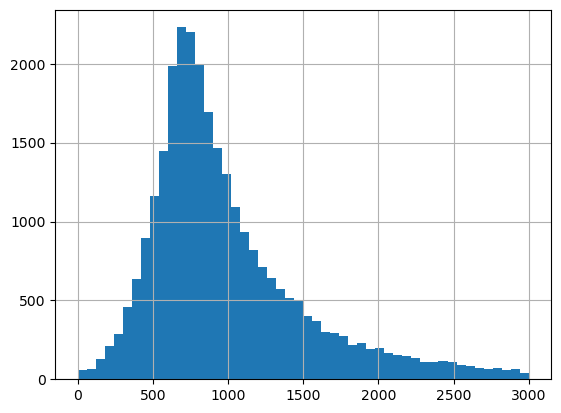

In [96]:
stats['edits'].hist(bins=50, range=(0,3000));

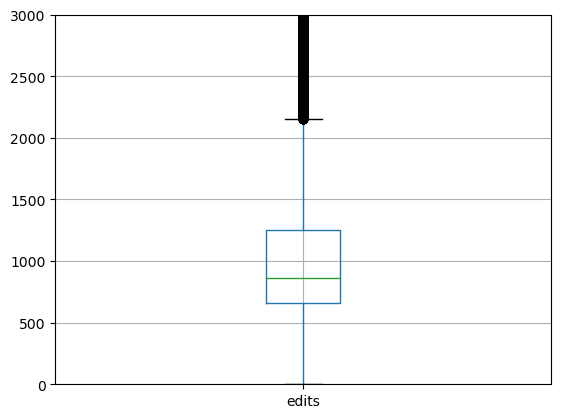

In [97]:
stats.boxplot('edits')
plt.ylim(0, 3000);

In [98]:
stats['edits'].value_counts()

722      56
694      53
736      52
661      52
754      52
         ..
3857      1
2308      1
5077      1
14844     1
2724      1
Name: edits, Length: 3484, dtype: int64

In [99]:
stats['edits'].describe()

count    28950.000000
mean      1108.418860
std       1079.105738
min          0.000000
25%        656.000000
50%        865.000000
75%       1254.000000
max      56001.000000
Name: edits, dtype: float64

На гистограмме наблюдается нормальное распределение. Наиболее распространенное количество правок самых активных пользователей лежит в диапазоне от 650 до 1250. Среднее значение 1108 правок и медианное значение 865 правок не стремятся друг другу, это означает, что в данных присутствуют выбросы. Минимальное количество правок 0, но такого количества правок мало. Максимальное количество правок 56001. Значения свыше 2300 правок редки, и чем больше таких правок тем их меньше. 

[Как проверить данные на нормальность](https://www.codecamp.ru/blog/normality-test-python/)

In [100]:
#Проанализируем распределение столбца reverts, содержащего количества отмен чужих правок

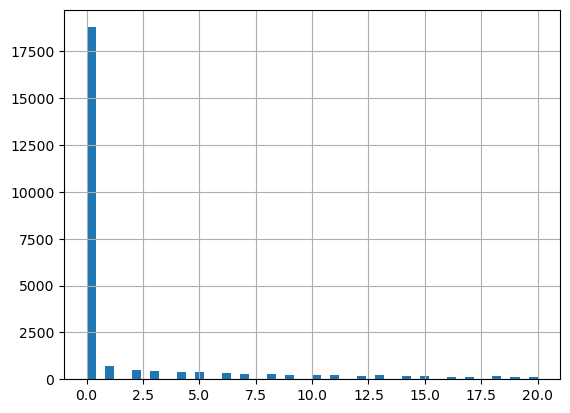

In [101]:
stats['reverts'].hist(bins=50, range=(0,20));

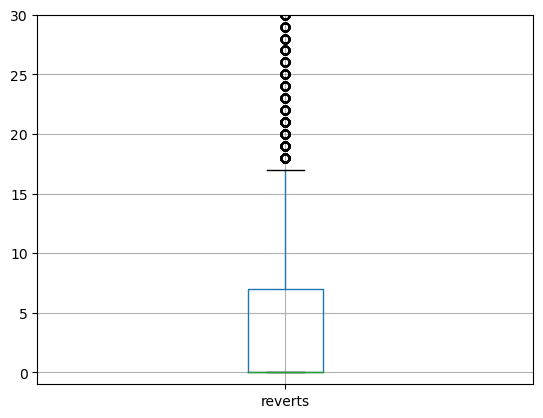

In [102]:
stats.boxplot('reverts')
plt.ylim(-1, 30);

In [103]:
stats['reverts'].value_counts()

0       18793
1         704
2         517
3         461
4         381
        ...  
547         1
492         1
738         1
649         1
2597        1
Name: reverts, Length: 678, dtype: int64

Чаще всего пользователи предпочитают не отменять чужие правки в своих статьях. Возможно причина отмен чужих правок связано с вандализмом. Большинство пользователей, отменяющие правки, отменяют их до 6 раз.

In [104]:
#Посчитаем число уникальных юзеров, попавших в топ-150 самых активных пользователей

In [105]:
stats['user'].nunique()

2541

Всего в таблице `stats` 2541 уникальных пользователей, попавших в топ-150 самых активных пользователей википедии.

In [106]:
#Посмотрим, как часто попадали пользователи в топ-150

In [107]:
freq_150 = stats['user'].value_counts().reset_index()
freq_150.head(10)

,index,user
0,Чръный человек,181
1,Lasius,168
2,GennadyL,162
3,Schekinov Alexey Victorovich,151
4,Valeriy10f,147
5,Анатолич1,146
6,Schrike,144
7,OneLittleMouse,141
8,Mark Ekimov,137
9,Vladimir Solovjev,133


In [108]:
#Посмотрим на распределение попаданий пользователей в ТОП-150

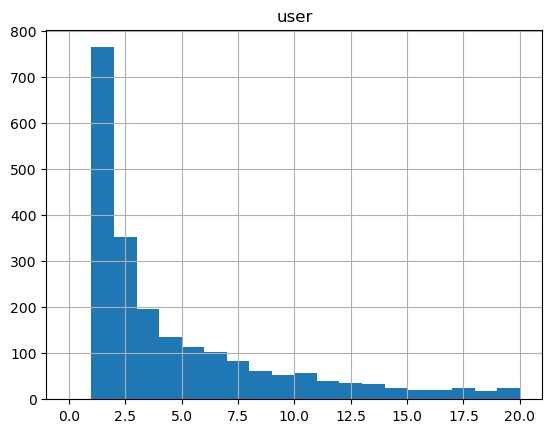

In [109]:
freq_150.hist(bins=20, range=(0,20));

In [110]:
#Выведем диаграмму размаха

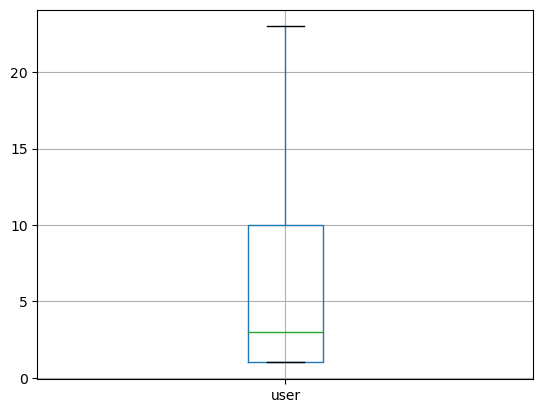

In [111]:
#sns.boxplot(x=freq_150, showfliers=False);
freq_150.boxplot('user', showfliers=False);

In [112]:
freq_150.describe()

,user
count,2541.000000
mean,11.393152
std,20.828001
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,181.000000


Чаще всех попадал в ТОП-150 пользователь с ником Чръный человек: 181 раз. Чаще всего пользователи попадают в ТОП-150 только один раз. Большая часть пользователей попадает в ТОП-150 от 1 до 10 раз. В количественном соотношении половина пользователей попадает в ТОП-150 меньше трех раз, а другая половина пользователей попадает в ТОП-150 больше трех раз. Чем чаще пользователи попадают в ТОП-150, тем таких пользователей меньше.

In [113]:
#Посмотрим на статистические показатели скорости правок

In [114]:
stats['speed_in_h'].describe()

count    28950.000000
mean        25.767703
std        173.828385
min          9.000000
25%         17.000000
50%         20.000000
75%         26.000000
max      22620.000000
Name: speed_in_h, dtype: float64

Минимальное количество правок, внесенное пользователем, попавшим в число самых активных пользователей за месяц, составляет 9 правок в час; максимальная скорость внесения правок: 22620 правки в час. Большая часть пользователей вносит правки со скоростью от 17 до 26 правок в час, при этом половина пользователей вносит менее 20 правок в час, а половина пользователей из ТОП-150 вносит более 20 правок в час.

### 4.2. Пользовательские характеристики.

Найдем самых активных пользователей по общему количеству совершенных действий. Для этого создадим столбец `total_activity` и для каждого пользователя найдем сумму правок, отмен чужих правок и иных действий.

In [115]:
stats['total_activity'] = stats['edits'] + stats['reverts'] + stats['log'] 
stats.head(3)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb,month,year,time_min,speed_in_h,total_activity
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,2007-08-01,262.0,1126.4,39936.0,8,2007,5700,34,3210
1,1809,0,1328,395k,2.8M,42M,129h,24/h,Obersachse,2007-08-01,395.0,2867.2,43008.0,8,2007,7740,24,3137
2,2734,0,0,16k,15k,19M,105h,26/h,Monegasque~ruwiki,2007-08-01,16.0,15.0,19456.0,8,2007,6300,26,2734


Создадим сводную таблицу по пользователям и агрегированным значениям.

In [116]:
activ_users = stats.pivot_table(
    index='user', values='total_activity', aggfunc='sum'
).sort_values(by='total_activity', ascending=False)
activ_users.head(10)

,total_activity
user,
MarchHare1977,669580
Q-bit array,668567
Valdis72,460622
Simba16,389407
Чръный человек,361500
Lasius,359371
Tempus,359260
Schrike,310467
Schekinov Alexey Victorovich,310197


40% пользователей из десятки тех, кто наиболее часто попадает в ТОП-150 попали в десятку наиболее активных пользователей по количеству правок: Чръный человек, Lasius, Schekinov Alexey Victorovich, Schrike.

In [117]:
activ_users.describe()

,total_activity
count,2541.000000
mean,16886.183392
std,42397.855664
min,320.000000
25%,1050.000000
50%,3228.000000
75%,12004.000000
max,669580.000000


(0.0, 40000.0)

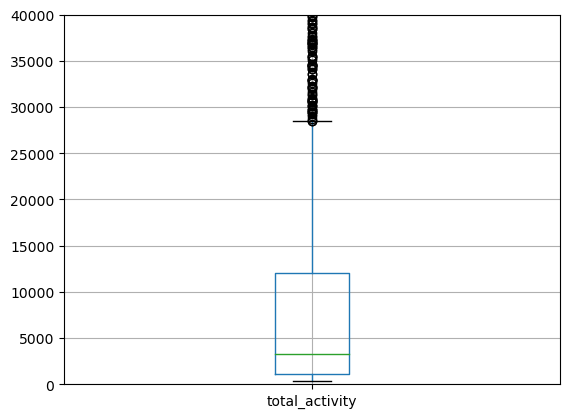

In [118]:
activ_users.boxplot('total_activity')
plt.ylim(0, 40000)

Для всех пар столбцов построим матрицу корреляции.

In [119]:

stats[['edits','reverts','log', 'diff_kb', 'volume_kb', \
       'tot_size_kb','total_activity','time_min']].corr().style.background_gradient(cmap='RdYlGn')

,edits,reverts,log,diff_kb,volume_kb,tot_size_kb,total_activity,time_min
edits,1.000000,0.103450,0.097184,0.201376,0.269107,0.341315,0.819987,0.663268
reverts,0.103450,1.000000,0.166750,0.098438,0.229097,0.170007,0.255878,0.127403
log,0.097184,0.166750,1.000000,0.049698,0.144584,0.054456,0.643285,0.250361
diff_kb,0.201376,0.098438,0.049698,1.000000,0.808793,0.140555,0.188452,0.236944
volume_kb,0.269107,0.229097,0.144584,0.808793,1.000000,0.309356,0.303545,0.368908
tot_size_kb,0.341315,0.170007,0.054456,0.140555,0.309356,1.000000,0.303136,0.490565
total_activity,0.819987,0.255878,0.643285,0.188452,0.303545,0.303136,1.000000,0.652138
time_min,0.663268,0.127403,0.250361,0.236944,0.368908,0.490565,0.652138,1.000000


Мы можем наблюдать высокую линейную зависимость между столбцами:

 - `diff_kb` и `volume_kb`: при росте разницы между добавленным и удаленным растет общий объем всего, что сделал пользователь.
    
 - `total_activity` и `edits`: в сумму `total_activity` входят правки `edits`.
     
Мы можем наблюдать среднюю линейную зависимость между столбцами:
 - `edits` и `time_min`: при росте количества правок растет время пребывания на сайте
 - `total_activity` и `time_min`: при росте общей активности растет время пребывания на сайте


### 4.3 RFM анализ пользователей, попавших в ТОП-150

Проведем rfm-сегментацию, основанную на поведении пользователей, которые более одного раза попадали в ТОП-150.

Представим, что дата проведения анализа следующий день после максимальной даты: введем переменную `snapshot_date`, увеличенной на один день даты последнего пребывания на сайте.

 - В качестве показателя `recency` возьмем дату последнего попадания в ТОП-150 самых активных пользователей.

 - В качестве показателя `frequency` возьмем частоту попаданий в ТОП-150 самых активных пользователей.
 
 - В качестве показателя `monetary` возьмем общее количество совершенных пользователем действий `total_activity`.

In [120]:
snapshot_date = stats['txt'].max() + timedelta(days=1)
snapshot_date

datetime.date(2023, 8, 2)

Дата проведения анализа: 2 августа 2023 года.

In [121]:
data_process = stats.groupby(['user']).agg({
    'txt': lambda x: (snapshot_date - x.max()).days,
    'user': 'count',
    'total_activity': 'sum'})

В столбце `recency` содержится давность попадания в ТОП-150, в столбце `frequency` содержится частота попадания в ТОП-150, в столбце `monetary` содержится общий вклад (количество совершенных пользователем действий) 

In [122]:
data_process.columns = ['recency', 'frequency', 'monetary']
data_process.head()

,recency,frequency,monetary
user,,,
-kgoodluck-,62,3,4586
0lesja Sh,4049,1,825
0x0F,2526,1,651
1.b2-b4,2253,4,4057
102RB,4688,1,947


In [123]:
print('В датафрейме {} строк и {} столбца.'
      .format(data_process.shape[0], data_process.shape[1]))     

В датафрейме 2541 строк и 3 столбца.


In [124]:
#Посмотрим на распределение показателей, использую библиотеку seaborn

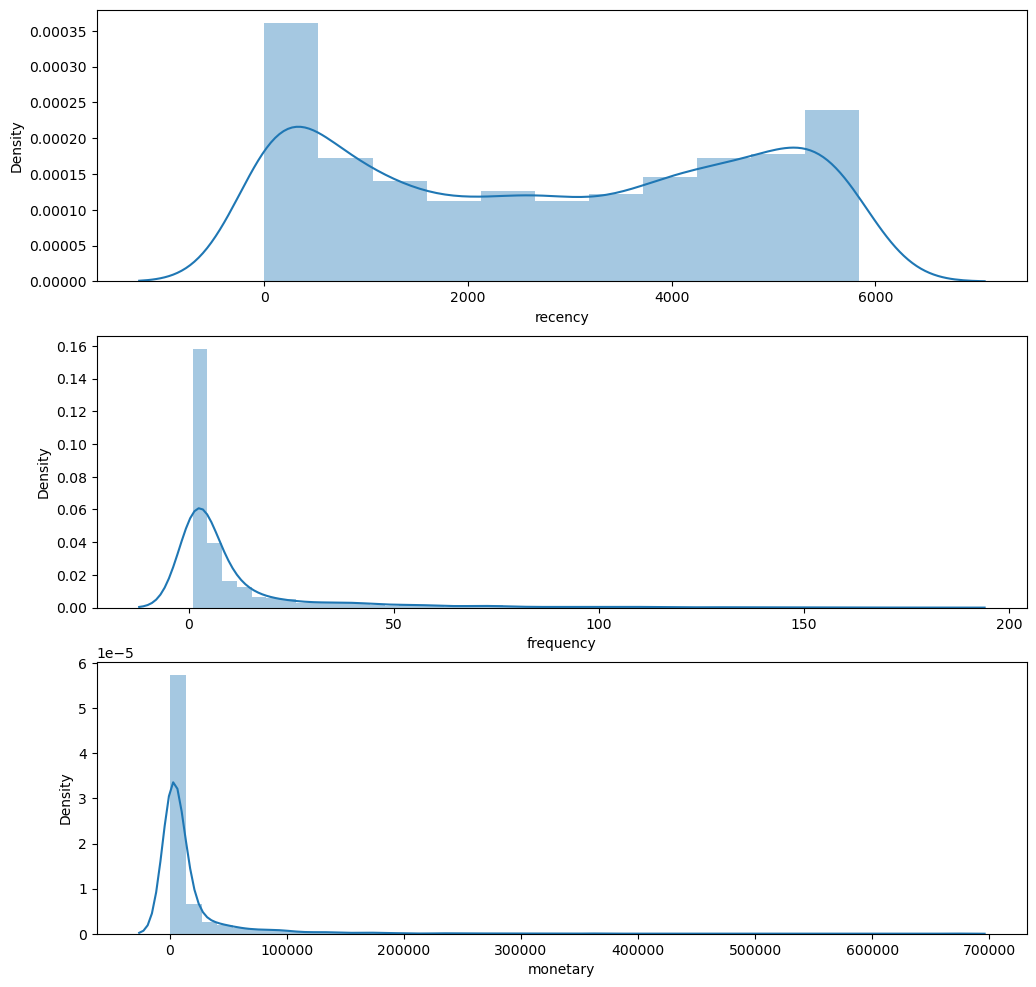

In [125]:
plt.figure(figsize=(12,12))

plt.subplot(3, 1, 1); sns.distplot(data_process['recency'])

plt.subplot(3, 1, 2); sns.distplot(data_process['frequency'])


plt.subplot(3, 1, 3); sns.distplot(data_process['monetary'])

plt.show()

На гистограмме столбца `recency`, содержащего давность попадания в ТОП-150 мы можем наблюдать бимодальное распределение: то есть часть пользователей попадали в ТОП-150 давно, а вторая часть пользователей попадали в ТОП-150 сравнительно недавно.

Для столбцов `frequency` и `monetary` наблюдается экспоненциальное распределение. Основная часть показателей находится в районе единицы, то есть большинство пользователей попадает в ТОП-150 редко, и вносят небольшой вклад, по сравнению с ультраактивными пользователями. Но есть пользователи, вносят большой вклад (активно правят),  и достаточно часто попадают в ТОП 150, поэтому распределение имеет достаточно большой правосторонний хвост.

Проведем логарифмирование, для того, чтобы группы стали более полновесными. Логарифмирование позволит, не меняя показатели, привести их к нормальному виду, что позволит провести более точную сегментацию.

In [126]:
# Логарифмирование столбца 'recency'
data_process['recency_log'] = np.log(data_process['recency'])

# Логарифмирование столбца 'frequency'
data_process['frequency_log'] = np.log(data_process['frequency'])

# Логарифмирование столбца 'monetary'
data_process['monetary_log'] = np.log(data_process['monetary'])

In [127]:
#Посмотрим, как изменилось распределение

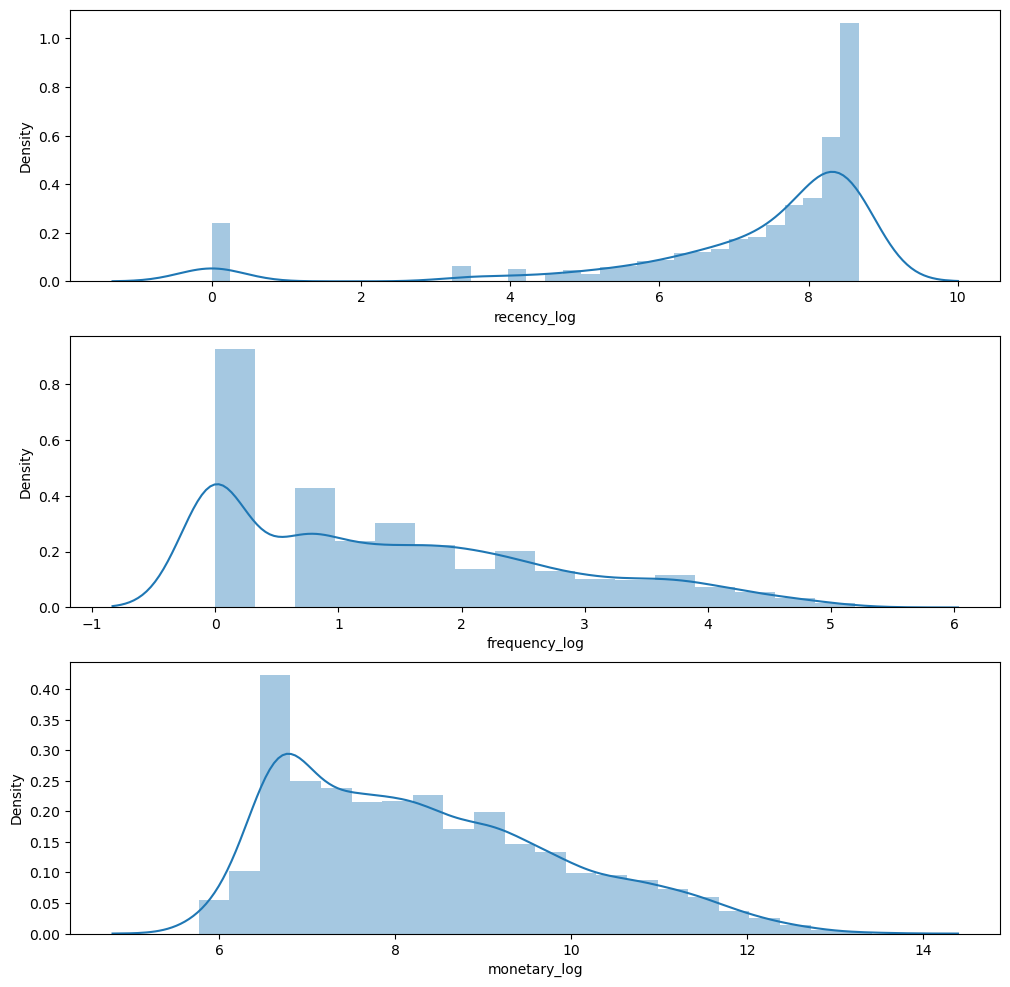

In [128]:
plt.figure(figsize=(12,12))

plt.subplot(3, 1, 1); sns.distplot(data_process['recency_log'])

plt.subplot(3, 1, 2); sns.distplot(data_process['frequency_log'])


plt.subplot(3, 1, 3); sns.distplot(data_process['monetary_log'])

plt.show()

Каждый показатель логарифмированного значения разбиваем на равные отрезки (бины). Используем три отрезка и метод `cut()`.

In [129]:
#Производим вычисление для групп R и F
#Создаем метки для recency и frequency
#Так как показатель recency для нас чем он больше, тем хуже(тем дольше времени назад пользователь попадал в ТОП-150), 
#для меток мы используем функцию range от 3 до 0 с шагом -1
#Для monetary и frequency мы используем range с обычным шагом 1, начиная с одного.
r_labels = range(3, 0, -1); f_labels = range(1, 4)
r_groups = pd.cut(data_process['recency_log'], bins=3, labels = r_labels)
f_groups = pd.cut(data_process['frequency_log'], bins=3, labels = f_labels)
#Создаем новые колонки r и f
data_process = data_process.assign(r = r_groups.values, f = f_groups.values)
data_process.head(3)

,recency,frequency,monetary,recency_log,frequency_log,monetary_log,r,f
user,,,,,,,,
-kgoodluck-,62,3,4586,4.127134,1.098612,8.430763,2,1
0lesja Sh,4049,1,825,8.306225,0.000000,6.715383,1,1
0x0F,2526,1,651,7.834392,0.000000,6.478510,1,1


In [130]:
m_labels = range(1, 4)
m_groups = pd.cut(data_process['monetary_log'], bins=3, labels = m_labels)
data_process = data_process.assign(m = m_groups.values)
data_process.head(5)

,recency,frequency,monetary,recency_log,frequency_log,monetary_log,r,f,m
user,,,,,,,,,
-kgoodluck-,62,3,4586,4.127134,1.098612,8.430763,2,1,2
0lesja Sh,4049,1,825,8.306225,0.000000,6.715383,1,1,1
0x0F,2526,1,651,7.834392,0.000000,6.478510,1,1,1
1.b2-b4,2253,4,4057,7.720018,1.386294,8.308199,1,1,1
102RB,4688,1,947,8.452761,0.000000,6.853299,1,1,1


In [131]:
#Строим тепловую карту

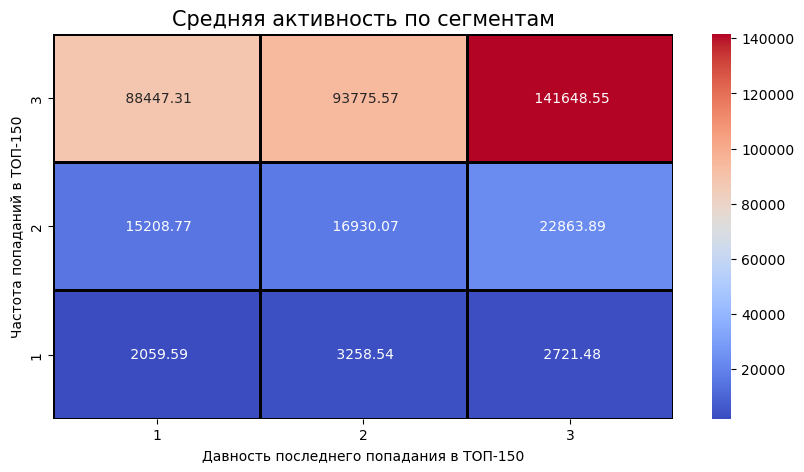

In [208]:
rfm_table = data_process.pivot_table(
    index='f', columns='r', values = 'monetary', aggfunc=np.mean).applymap(float)

plt.figure(figsize=(10, 5))

sns.heatmap(rfm_table, annot=True, fmt=' .2f', linewidths=1, linecolor='black', cmap='coolwarm',  color='black')

plt.title('Средняя активность по сегментам', fontsize=15, color='black')
plt.xlabel('Давность последнего попадания в ТОП-150',  fontsize=10, color='black')
plt.ylabel('Частота попаданий в ТОП-150',  fontsize=10, color='black')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Средняя активность пользователей, наиболее часто попадающих в ТОП-150, а также попавших в ТОП-150 в ближайшее время, составляет 141648 правок. Пользователи, которые часто попадают в ТОП-150 часто имеют высокую активность правок и других действий. Во тепловой карте можно сделать вывод: чем чаще пользователи попадают в ТОП-150, тем выше средняя активность правок.

Создаем группы пользователей:
   - `11`: давно и редко: **бездействующие**;
    
   - `21`:  недавно и редко: **колеблющиеся**;
    
   - `31`:  в ближайшее время, но редко: **новички**;
    
   - `12`:  давно и часто: **потерянные**;
    
   - `22`:  недавно и часто: **нуждающиеся во внимании**;    
    
   - `32`: в ближайшее время и часто: **звезды**;
    
   - `13`: давно и регулярно: **нельзя потерять**;
    
   - `23`: недавно и регулярно: **лоялисты**;  
    
   - `33`: в ближайшее время и регулярно: **чемпионы**    

In [133]:
#Используем словарь для создания наименований сегментов

In [134]:
segm_map={
    '11': '11_бездействующие',
    '21': '21_колеблющиеся',
    '31': '31_новички',
    '12': '12_потерянные',
    '22': '22_нуждающиеся во внимании',
    '32': '32_звезды',
    '13': '13_нельзя потерять',
    '23': '23_лоялисты',
    '33': '33_чемпионы',
}
data_process['segment'] = data_process['r'].astype(str) + data_process['f'].astype(str)
data_process['segment'] = data_process['segment'].replace(segm_map, regex=True)


In [135]:
rfm_agg = data_process.groupby('segment').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary': ['mean', 'count']    
}).round(1)
rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['Среднее кол-во дней', 'Кол-во попаданий', 'Средняя активность', 'Кол-во пользователей']
rfm_agg

,Среднее кол-во дней,Кол-во попаданий,Средняя активность,Кол-во пользователей
segment,,,,
11_бездействующие,3570.5,2.0,2059.6,1444
12_потерянные,2901.5,12.3,15208.8,571
13_нельзя потерять,1563.6,52.2,88447.3,140
21_колеблющиеся,154.3,2.3,3258.5,96
22_нуждающиеся во внимании,154.5,14.0,16930.1,86
23_лоялисты,131.7,61.0,93775.6,54
31_новички,1.0,2.8,2721.5,21
32_звезды,1.0,15.6,22863.9,53
33_чемпионы,1.0,80.7,141648.6,76


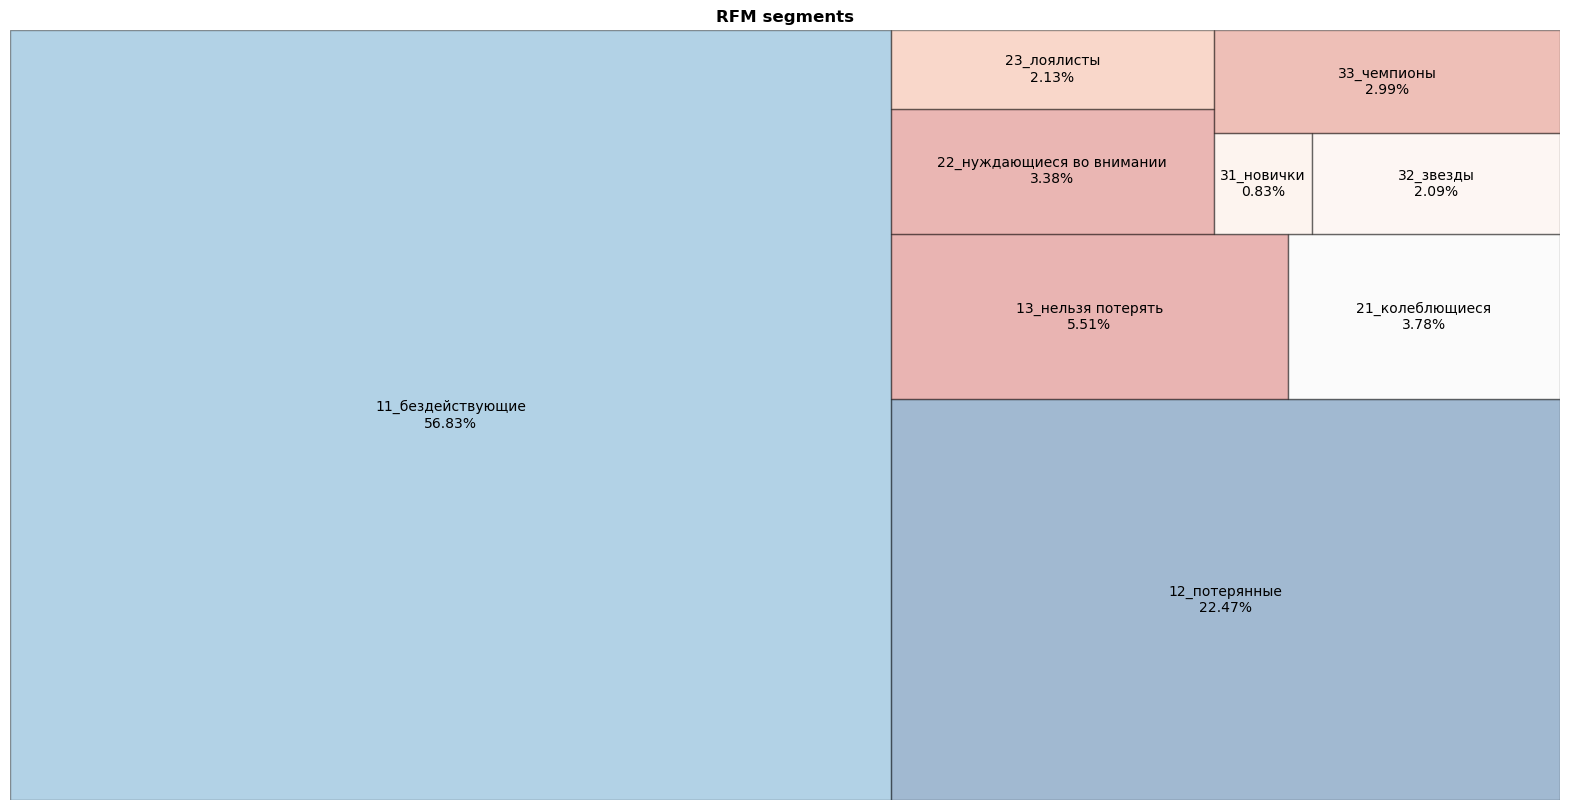

In [136]:
# Рассчитываем проценты для каждого сегмента данных
rfm_agg['Процент пользователей'] = (rfm_agg['Кол-во пользователей'] / rfm_agg['Кол-во пользователей'].sum()) * 100

# Создаем график
fig = plt.gcf()
ax = fig.add_subplot
labels = [f'{label}\n{percent:.2f}%' for label, percent in zip(rfm_agg.index.values, rfm_agg['Процент пользователей'])]  # Добавляем проценты к меткам
fig.set_size_inches(20, 10)  # Увеличиваем размер графика
plt.set_cmap('RdBu')

# Увеличиваем размер квадратов и устанавливаем рамки
squarify.plot(sizes=rfm_agg['Кол-во пользователей'], label=labels, alpha=0.4, text_kwargs={'fontsize': 10}, edgecolor="black")  # Устанавливаем pad
plt.title('RFM segments', fontsize=12, fontweight='bold')  # Увеличиваем размер заголовка
plt.axis('off')
plt.show()


Основными пользователями 57% являются бездействующие пользователи, попадавшие в ТОП-150 более 9 лет назад в среднем 2 раза и минимальной активностью; и 22.5% потерянных пользователей (попадавшие в ТОП-150 8 лет назад в среднем 12 раз). Чемпионы, попадающие регулярно в ТОП-150 в среднем 80 раз составляют 3%, зввезды 2%, лоялисты 2%, колеблющиеся почти 4%. Очень маленький процент новичков: 0.83%.

In [137]:
#Матрица корреляции, сохраняю себе на будущее
#correlation_matrix = rfm_agg[['Среднее кол-во дней', 'Кол-во попаданий', 'Средняя активность']].corr()

#Visualize the correlation matrix using a heatmap
#fig_heatmap = go.Figure(data=go.Heatmap(
                   #z=correlation_matrix.values,
                   #x=correlation_matrix.columns,
                   #y=correlation_matrix.columns,
                  
                   #colorbar=dict(title='Correlation')))

#fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

#fig_heatmap.show()

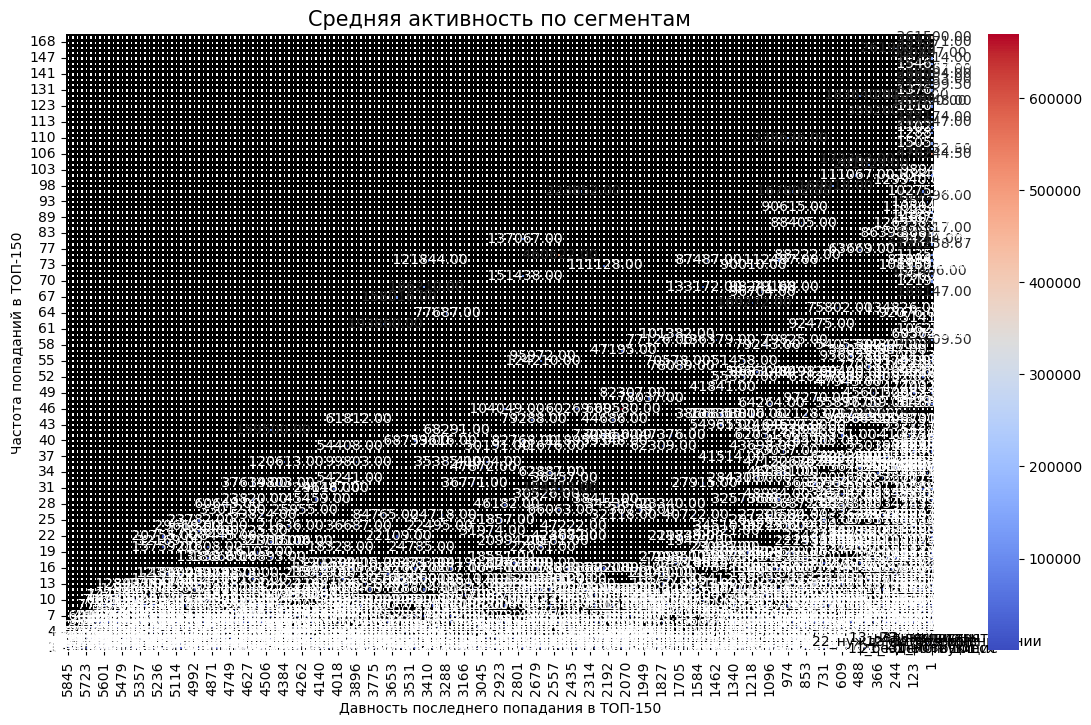

In [138]:
# Создаем таблицу сегментов rfm_table_segments
rfm_table_segments = data_process.pivot_table(
    index='f', columns='r', values='segment', aggfunc='first')

plt.figure(figsize=(14, 8))

ax = sns.heatmap(rfm_table, annot=True, fmt=' .2f', linewidths=1, linecolor='black', cmap='coolwarm')

plt.title('Средняя активность по сегментам', fontsize=15, color='black')
plt.xlabel('Давность последнего попадания в ТОП-150', fontsize=10, color='black')
plt.ylabel('Частота попаданий в ТОП-150', fontsize=10, color='black')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Добавляем метки сегментов к квадратам на тепловой карте
for i in range(rfm_table_segments.shape[0]):
    for j in range(rfm_table_segments.shape[1]):
        segment_label = rfm_table_segments.iloc[i, j]
        if i % 2 == 0:  # Четные строки - метки выше
            plt.text(j + 0.5, i + 0.35, segment_label, ha='center', va='center', fontsize=10, rotation=0, color='black')
        else:  # Нечетные строки - метки ниже
            plt.text(j + 0.5, i + 0.65, segment_label, ha='center', va='center', fontsize=10, rotation=0, color='black')

plt.show()

Средняя активность чемпионов 141648 правок, средняя активность лоялистов 93775 правок; средняя активность бездействующих пользователей 2059 правок. Средняя активность постоянных пользователей 22863 правки. **Чем чаще и ближе к настоящему времени пользователи попадают в ТОП-150, тем выше средяя активность.**

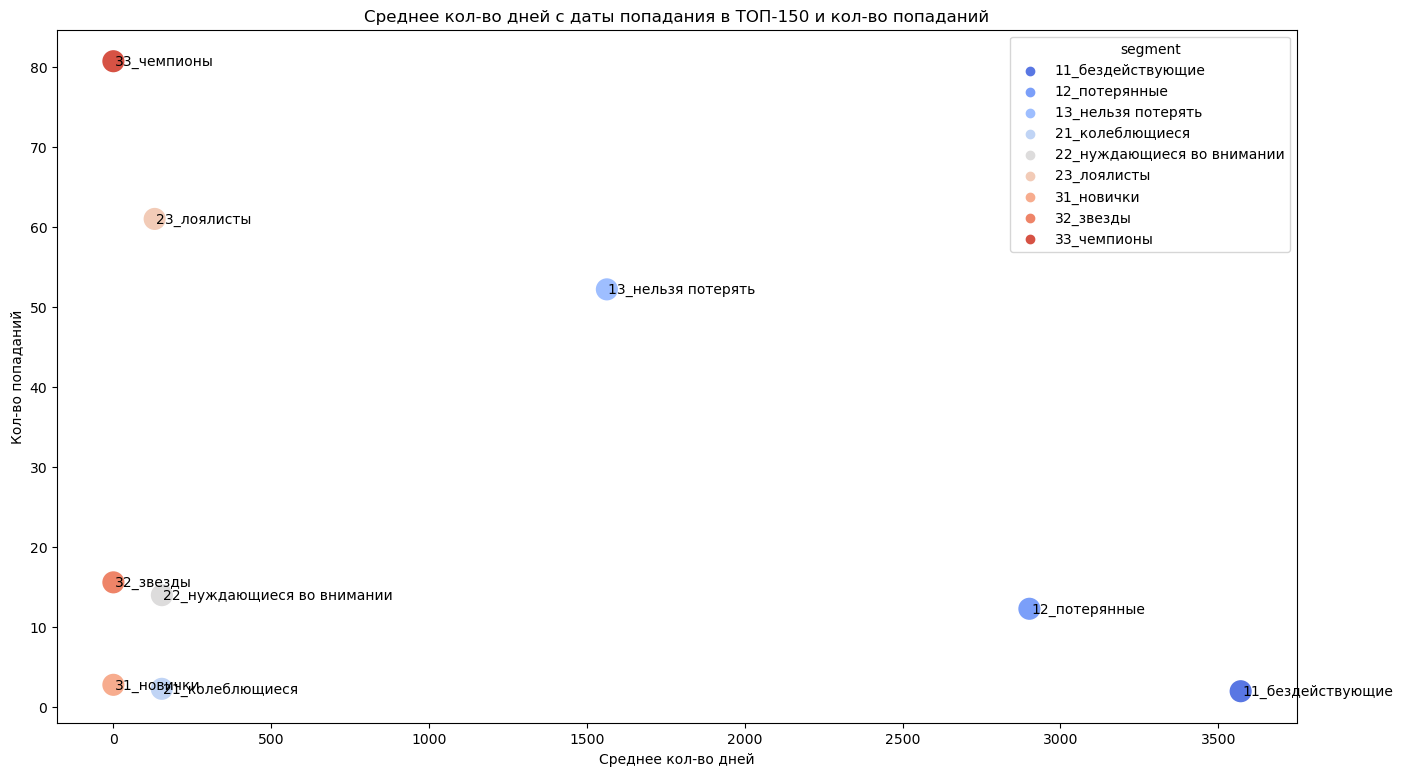

In [139]:
rfm_agg = rfm_agg.reset_index()
palette = sns.color_palette('coolwarm', 9)

fig, ax = plt.subplots(figsize=(16, 9))

plot = sns.scatterplot(x='Среднее кол-во дней', y='Кол-во попаданий', data=rfm_agg, hue='segment', s=300, palette=palette)

# Добавляем текстовые метки к точкам графика.
for i in range(len(rfm_agg)):
    plot.text(rfm_agg['Среднее кол-во дней'][i] + 5,
              rfm_agg['Кол-во попаданий'][i] - 0.5,
              rfm_agg['segment'][i],
              horizontalalignment='left',
              size='medium', color='black')

ax.set_title('Среднее кол-во дней с даты попадания в ТОП-150 и кол-во попаданий')
plt.show()

**Вывод:**
    
- Гистограмма количества правок показывает нормальное распределение. Наиболее распространенное количество правок самых активных пользователей, попавших в Топ-150 лежит в диапазоне от 650 до 1250. Среднее значение 1108 правок и медианное значение 865 правок не стремятся друг другу, это означает, что в данных присутствуют выбросы. Минимальное количество правок 0, но такого количества правок мало. Максимальное количество правок 56001. Значения свыше 2300 правок редки, и чем больше таких правок тем их меньше.


- Чаще всего пользователи предпочитают не отменять чужие правки в своих статьях. Возможно причина отмен чужих правок связано с вандализмом. Большинство пользователей, отменяющие правки, отменяют их до 6 раз.


- Чаще всех попадал в ТОП-150 пользователь с ником Чръный человек: 181 раз. Чаще всего пользователи попадают в ТОП-150 только один раз. Большая часть пользователей попадает в ТОП-150 от 1 до 10 раз. В количественном соотношении половина пользователей попадает в ТОП-150 меньше трех раз, а другая половина пользователей попадает в ТОП-150 больше трех раз. Чем чаще пользователи попадают в ТОП-150, тем таких пользователей меньше.


- Минимальное количество правок, внесенное пользователем, попавшим в число самых активных пользователей за месяц, составляет 9 правок в час; максимальная скорость внесения правок: 22620 правки в час. Большая часть пользователей вносит правки со скоростью от 17 до 26 правок в час, при этом половина пользователей вносит менее 20 правок в час, а половина пользователей из ТОП-150 вносит более 20 правок в час.

- 40% пользователей из десятки тех, кто наиболее часто попадает в ТОП-150 попали в десятку наиболее активных пользователей по количеству правок: Чръный человек, Lasius, Schekinov Alexey Victorovich, Schrike.

- Мы можем наблюдать высокую линейную зависимость между столбцами:

    `diff_kb` и `volume_kb`: при росте разницы между добавленным и удаленным растет общий объем всего, что сделал пользователь.
    `total_activity` и `edits`: в сумму `total_activity` входят правки `edits`.
    Мы можем наблюдать среднюю линейную зависимость между столбцами:

    `edits` и `time_min`: при росте количества правок растет время пребывания на сайте
    `total_activity` и `time_min`: при росте общей активности растет время пребывания на сайте
    
 - Проведен RFM - анализ пользователей   
    - В качестве `recency` определена дата последнего попадания в ТОП-150 самых активных пользователей.

    - В качестве `frequency` определена частота попаданий в ТОП-150 самых активных пользователей.

    - В качестве `monetary` определено общее количество совершенных пользователем действий total_activity.
    
    
    Основными пользователями **57% являются бездействующие пользователи**, попадавшие в ТОП-150 более 9 лет назад в среднем 2 раза и минимальной активностью; и **22.5% потерянных пользователей** (попадавшие в ТОП-150 8 лет назад в среднем 12 раз). **Чемпионы, попадающие регулярно в ТОП-150 в среднем 80 раз составляют 3%**, **звезды 2%**, **лоялисты 2%**, **колеблющиеся почти 4%**. Очень маленький процент **новичков: 0.83%**.
    Основными пользователями 57% являются бездействующие пользователи, попадавшие в ТОП-150 более 9 лет назад в среднем 2 раза и минимальной активностью; и 22.5% потерянных пользователей (попадавшие в ТОП-150 8 лет назад в среднем 12 раз). Чемпионы, попадающие регулярно в ТОП-150 в среднем 80 раз составляют 3%, звезды 2%, лоялисты 2%, колеблющиеся почти 4%. Очень маленький процент новичков: 0.83%.
    
    Средняя активность **чемпионов 141648 правок**, средняя активность **лоялистов 93775 правок**; средняя активность **бездействующих пользователей 2059 правок**. Средняя активность **постоянных пользователей 22863 правки**.  **Чем чаще и ближе к настоящему времени пользователи попадают в ТОП-150, тем выше средяя активность.**
 


## 5. Исследование данных таблицы с выборами.

### 5.1. Анализ распределения по столбцам таблицы с голосованиями.

Таблица `votes` содержит информацию о голосовании. 

In [140]:
votes.head()

,voter,can_vote,time,candidate,n,vote,lt,vote_date,month_vote,year_vote,lt_day,candidate_n,passed,voters_activity
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222,2008-11-23,11,2008,0,EvgenyGenkin_7_0,True,активные избиратели
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222,2008-11-23,11,2008,0,Solon_7_0,False,активные избиратели
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611,2008-11-23,11,2008,0,Agent001_7_0,False,активные избиратели
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611,2008-11-23,11,2008,0,Chronicler_7_0,True,активные избиратели
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611,2008-11-23,11,2008,0,EvgenyGenkin_7_0,True,активные избиратели


In [141]:
#Посчитаем количество уникальных голосующих

In [142]:
votes['voter'].nunique()

1862

Всего 1862 гососующего пользователя

In [143]:
#Посчитаем количество уникальных кандидатов

In [144]:
votes['candidate'].nunique()

223

Всего 223 кандидата.

In [145]:
#Посмотрим, в какие месяцы проходит голосование

In [146]:
votes['month_vote'].unique()

array([11,  5,  1,  6, 12,  7,  8,  2,  3])

Голосование проходит только девять месяцев из двенадцати: январь, февраль, март, май, июнь, июль, август, ноябрь, декабрь. Голосование не проходит в апреле, сентябре, октябре.

In [147]:
votes['year_vote'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023])

Мы обладаем данным по голосованию за 16 лет с 2008 год по 2023 год, при этом в таблице отсутствуют данные за 2007 год (таблица `stats` содержит данные с 2007 года).

In [148]:
#Посмотрим на общее распределение голосов по годам

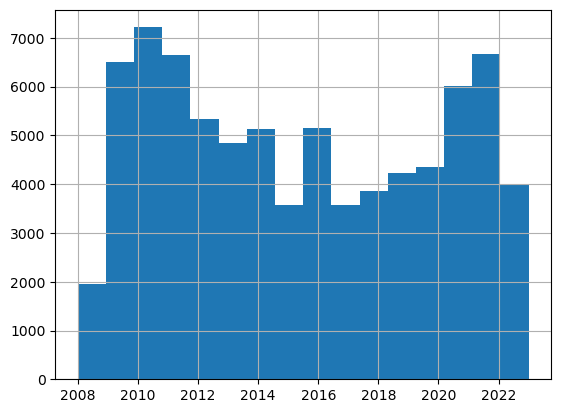

In [149]:
votes['year_vote'].hist(bins=16);

In [150]:
votes['year_vote'].value_counts()

2010    7217
2022    6677
2011    6645
2009    6496
2021    6015
2012    5327
2016    5149
2014    5132
2013    4843
2020    4358
2019    4236
2023    4002
2018    3863
2017    3583
2015    3579
2008    1952
Name: year_vote, dtype: int64

In [151]:
#Посмотрим на общее распределение голосов по месяцам

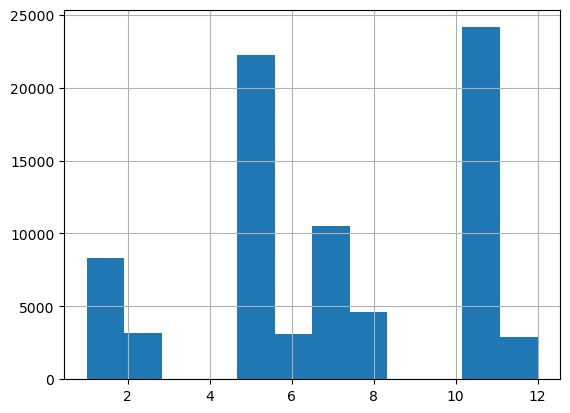

In [152]:
votes['month_vote'].hist(bins=12);

In [153]:
votes['month_vote'].value_counts()

11    24144
5     22223
7     10512
1      8309
8      4644
2      3198
6      3111
12     2897
3        36
Name: month_vote, dtype: int64

Наименее активный по числу отданных голосов 2008 год: Всего было отдано 1952 голоса, на следующий 2009 год общее число голосов выросло в 3.3 раза. Самый активный по числу отданных голосов оказался 2010 год: всего было отдано 7217 голосов, что в 3.6 раз больше, чем в 2008 году; второй по активности 2022 год: было отдано 6677 голосов. В 2015, с 2017 по 2020, а также в 2022 наблюдается сниженное число отданных голосов в диапазоне 3579 - 4358 голосов. 

Наиболее активный месяц по числу отданных голосов ноябрь: 24144 голоса; на втором месте по активности отданных голосов находится май: 22223 голоса, наименее активным месяцем по числу отданных голосов является март: всего 36 голосов, что в 670 раз меньше, чем в самом активном месяце. 

In [154]:
#Посмотрим на распределение столбца `lt`

In [155]:
votes['lt_day'].max()

7

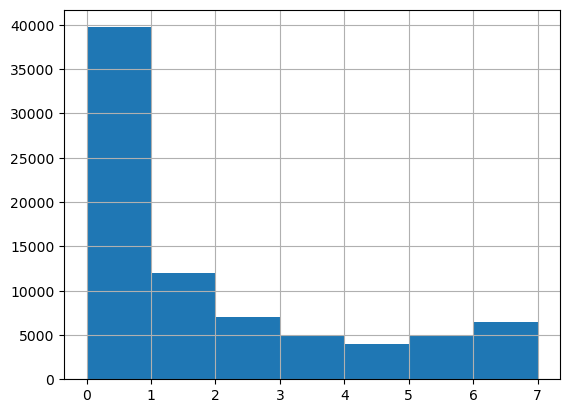

In [156]:
lt_day = votes['lt_day'];
lt_day.hist(bins=7);

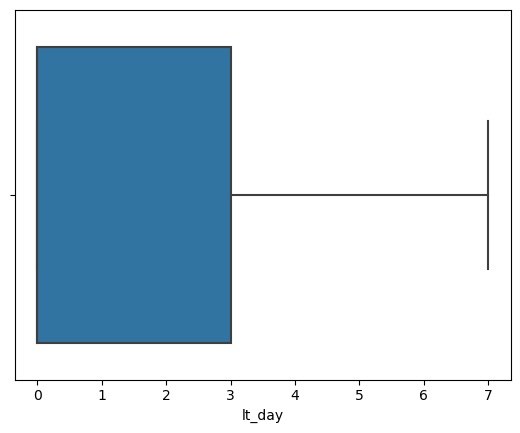

In [157]:
sns.boxplot(x=lt_day, showfliers=False);

In [158]:
votes['lt_day'].describe()

count    79074.000000
mean         1.521499
std          2.018267
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max          7.000000
Name: lt_day, dtype: float64

In [159]:
votes['lt_day'].value_counts()

0    39731
1    11953
2     7079
6     6414
3     4984
5     4860
4     3969
7       84
Name: lt_day, dtype: int64

Голосование длится семь суток. Большая часть пользователей голосует в нулевой лайфтайм - в первые сутки. На вторые сутки количество голосов снижается в три раза и идет на постепенное убывание. На пятые сутки количество голосов минимальное. На шестые и седьмые сутки количество голосов постепенно растет, но очень медленно, не превышая общее количество голосов, отданных на третьи сутки. 

In [160]:
votes.head()

,voter,can_vote,time,candidate,n,vote,lt,vote_date,month_vote,year_vote,lt_day,candidate_n,passed,voters_activity
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222,2008-11-23,11,2008,0,EvgenyGenkin_7_0,True,активные избиратели
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222,2008-11-23,11,2008,0,Solon_7_0,False,активные избиратели
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611,2008-11-23,11,2008,0,Agent001_7_0,False,активные избиратели
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611,2008-11-23,11,2008,0,Chronicler_7_0,True,активные избиратели
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611,2008-11-23,11,2008,0,EvgenyGenkin_7_0,True,активные избиратели


Найдем победивших кандидатов. Примем во внимание информацию от заказчика, что все голосующие пользователи допущены до выборов, поэтому параметр `can_vote` можно не учитывать.

In [161]:
#Создадим таблицу votes_result_win c победившими кандидатами

In [162]:
votes_result_win = votes.loc[votes['passed'] == True, ['candidate', 'n', 'month_vote', 'year_vote']].drop_duplicates()
votes_result_win.head(10)

,candidate,n,month_vote,year_vote
0,EvgenyGenkin,7.0,11,2008
3,Chronicler,7.0,11,2008
5,Ilya Voyager,7.0,11,2008
6,Kv75,7.0,11,2008
8,Александр Сигачёв,7.0,11,2008
15,Kaganer,7.0,11,2008
1953,Carn,8.0,5,2009
1954,DR,8.0,5,2009
1956,Levg,8.0,5,2009
1957,Victoria,8.0,5,2009


In [163]:
votes_result_win.groupby('n')['candidate'].nunique()

n
7.00     6
8.00     8
9.00     6
10.00    7
11.00    5
12.00    5
13.00    5
14.00    5
15.00    4
15.50    2
16.00    6
17.00    5
18.00    4
18.50    4
19.00    4
19.50    2
20.00    6
21.00    8
22.00    3
22.50    2
23.00    2
23.50    3
24.00    5
24.50    2
25.00    6
26.00    3
26.50    1
26.75    3
27.50    2
27.75    3
28.00    3
28.50    3
29.00    1
29.50    6
30.00    7
31.00    7
32.00    7
33.00    6
34.00    5
35.00    4
35.50    1
36.00    4
36.50    3
Name: candidate, dtype: int64

В выборах должно победить от 5 до 7 кандидатов.

In [164]:
#Найдем 3 кандидата, которые побеждают чаще всех

In [165]:
top_10_win = votes_result_win['candidate'].value_counts().reset_index().head(3)
top_10_win

,index,candidate
0,Vladimir Solovjev,10
1,Biathlon,9
2,Sir Shurf,9


Чаще всех на выборах побеждал кандидат Vladimir Solovjev: 10 раз. Biathlon и Sir Shurf побеждали на выборах 9 раз.

Найдем проигравших кандидатов

In [166]:
#Создадим таблицу votes_result_lost c проигравшими кандидатами

In [167]:
votes_result_lost = votes.loc[votes['passed'] == False, ['candidate', 'n', 'month_vote', 'year_vote']].drop_duplicates()
votes_result_lost.head(10)

,candidate,n,month_vote,year_vote
1,Solon,7.0,11,2008
2,Agent001,7.0,11,2008
7,Ukkon,7.0,11,2008
17,Wulfson,7.0,11,2008
20,Alexandrov,7.0,11,2008
21,Berserkerus,7.0,11,2008
29,VasilievVV,7.0,11,2008
42,Pauk,7.0,11,2008
1952,LEMeZza,8.0,5,2009
1955,Котик полосатый,8.0,5,2009


In [168]:
#Найдем 3 кандидата, которые проигрывали выборы чаще всех

In [169]:
top_10_lost = votes_result_lost['candidate'].value_counts().reset_index().head(3)
top_10_lost

,index,candidate
0,Neolexx,15
1,Arsenal.UC,14
2,Фил Вечеровский,12


Чаще всех проигрывал выборы Neolexx: 15 раз, на втором месте пользователь с ником Arsenal.UC проиграл выборы 14 раз, на третьем месте Фил Вечеровский, который проиграл выборы 12 раз.

In [170]:
#Посчитаем кол-во пользователей, участвующих в выборах и попавших в ТОП-150 самых активных пользователей по кол-ву правок.
votes.loc[votes['voters_activity']=='активные избиратели', 'voter'].nunique()

1072

In [171]:
#Посчитаем кол-во пользователей, участвующих в выборах и ни разу не попавших в ТОП-150 
votes.loc[votes['voters_activity']=='не активные избиратели', 'voter'].nunique()

0

In [172]:
#Посмотрим на общее кол-во уникальных пользователей таблицы с голосованиями
votes['voter'].nunique()

1862

In [173]:
#Посчитаем общее кол-во уникальных пользователей, попавших в ТОП-150 
#Исключим из подсчета пользователей за 2007 год, так как таблица с голосованиями содержит данные с 2008 года.
stats.loc[stats['year'] != 2007, 'user'].nunique()


2444

Общее количество уникальных пользователей, попадавших в ТОП-150 в 2.2 раза превышает общее количество уникальных пользователей, принимавших участие в голосовании и попавших в ТОП-150. Пользователи, которые проявляют активность и попадают в ТОП-150 самых активных пользователей за месяц могут не принимать участие в выборах. Пользователи, проявляющие активность в написании статей не всегда проявляют активность в голосовании.

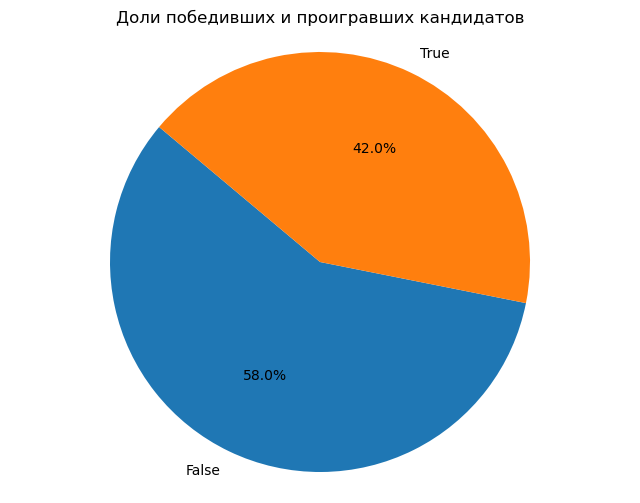

In [174]:
#Строим график соотношения долей победивших кандидатов к проигравшим
plt.figure(figsize=(8, 6))
# Подсчет количества значений "true" и "false"
passed_counts = votes['passed'].value_counts()

# Построение круговой диаграммы
plt.pie(passed_counts, labels=passed_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Задает равные масштабы по осям, чтобы получить круг
plt.title('Доли победивших и проигравших кандидатов')
plt.show()

Доля победивших на выборах кандидатов составляет 42%, доля проигравших выборы кандидатов составляет 58%.

### 5.2. Распределение избирателей по сегментам активности.

Проанализируем избирателей по сегментам активности. Для этого соединим данные с сегментами с таблицей с голосованием.

In [175]:
#создаю копию и складываю ее в data_process_2, чтобы не сломать последующий код, если там уже data_process используется
data_process_2 = data_process
data_process_2.reset_index(inplace=True)
data_process_2

,user,recency,frequency,monetary,recency_log,frequency_log,monetary_log,r,f,m,segment
0,-kgoodluck-,62,3,4586,4.127134,1.098612,8.430763,2,1,2,21_колеблющиеся
1,0lesja Sh,4049,1,825,8.306225,0.000000,6.715383,1,1,1,11_бездействующие
2,0x0F,2526,1,651,7.834392,0.000000,6.478510,1,1,1,11_бездействующие
3,1.b2-b4,2253,4,4057,7.720018,1.386294,8.308199,1,1,1,11_бездействующие
4,102RB,4688,1,947,8.452761,0.000000,6.853299,1,1,1,11_бездействующие
...,...,...,...,...,...,...,...,...,...,...,...
2536,№231-567,5479,7,3724,8.608678,1.945910,8.222554,1,2,1,12_потерянные
2537,もげ子,5267,9,6549,8.569216,2.197225,8.787068,1,2,2,12_потерянные
2538,姫宮南,5723,1,391,8.652248,0.000000,5.968708,1,1,1,11_бездействующие
2539,死亡,5479,1,1087,8.608678,0.000000,6.991177,1,1,1,11_бездействующие


In [176]:
stats = stats.merge(data_process_2[['user', 'segment']], on='user', how='left')
stats

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb,month,year,time_min,speed_in_h,total_activity,segment
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,2007-08-01,262.0,1126.4,39936.0,8,2007,5700,34,3210,12_потерянные
1,1809,0,1328,395k,2.8M,42M,129h,24/h,Obersachse,2007-08-01,395.0,2867.2,43008.0,8,2007,7740,24,3137,13_нельзя потерять
2,2734,0,0,16k,15k,19M,105h,26/h,Monegasque~ruwiki,2007-08-01,16.0,15.0,19456.0,8,2007,6300,26,2734,12_потерянные
3,2611,0,6,278k,350k,43M,135h,19/h,User№101,2007-08-01,278.0,350.0,44032.0,8,2007,8100,19,2617,13_нельзя потерять
4,917,6,1416,154k,1.2M,26M,98h,24/h,Kalan,2007-08-01,154.0,1228.8,26624.0,8,2007,5880,24,2339,12_потерянные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28945,621,13,23,127k,151k,20M,34h,19/h,Nchernov29,2023-08-01,127.0,151.0,20480.0,8,2023,2040,19,657,32_звезды
28946,417,8,254,382k,382k,3.6M,16h40,40/h,Winterpool,2023-08-01,382.0,382.0,3686.4,8,2023,1000,40,679,33_чемпионы
28947,566,35,31,561k,678k,42M,41h,14/h,Emil.arg,2023-08-01,561.0,678.0,43008.0,8,2023,2460,14,632,31_новички
28948,475,35,148,65k,81k,10M,41h,15/h,Lumaca,2023-08-01,65.0,81.0,10240.0,8,2023,2460,15,658,32_звезды


In [177]:
#Сгруппируем по пользователю, найдем общую сумму по активным правками, крайнюю дату активности и сегмент пользователя
stats_agg = stats.groupby('user').agg({'total_activity':'sum', 'txt':'max', 'segment':'first'}).reset_index()
stats_agg

,user,total_activity,txt,segment
0,-kgoodluck-,4586,2023-06-01,21_колеблющиеся
1,0lesja Sh,825,2012-07-01,11_бездействующие
2,0x0F,651,2016-09-01,11_бездействующие
3,1.b2-b4,4057,2017-06-01,11_бездействующие
4,102RB,947,2010-10-01,11_бездействующие
...,...,...,...,...
2536,№231-567,3724,2008-08-01,12_потерянные
2537,もげ子,6549,2009-03-01,12_потерянные
2538,姫宮南,391,2007-12-01,11_бездействующие
2539,死亡,1087,2008-08-01,11_бездействующие


In [178]:
columns_to_drop = ['can_vote', 'time', 'lt']
votes_agg = votes.merge(stats_agg,  left_on='voter', right_on='user', how='left').drop(columns=columns_to_drop)
votes_agg 

,voter,candidate,n,vote,vote_date,month_vote,year_vote,lt_day,candidate_n,passed,voters_activity,user,total_activity,txt,segment
0,Kalan,EvgenyGenkin,7.0,1,2008-11-23,11,2008,0,EvgenyGenkin_7_0,True,активные избиратели,Kalan,13875.0,2008-07-01,12_потерянные
1,Kalan,Solon,7.0,-1,2008-11-23,11,2008,0,Solon_7_0,False,активные избиратели,Kalan,13875.0,2008-07-01,12_потерянные
2,Altes,Agent001,7.0,-1,2008-11-23,11,2008,0,Agent001_7_0,False,активные избиратели,Altes,16683.0,2013-12-01,12_потерянные
3,Altes,Chronicler,7.0,1,2008-11-23,11,2008,0,Chronicler_7_0,True,активные избиратели,Altes,16683.0,2013-12-01,12_потерянные
4,Altes,EvgenyGenkin,7.0,1,2008-11-23,11,2008,0,EvgenyGenkin_7_0,True,активные избиратели,Altes,16683.0,2013-12-01,12_потерянные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79069,Hibirina,Venzz,36.5,-1,2023-08-30,8,2023,6,Venzz_36_5,True,пассивные избиратели,NaN,NaN,NaN,NaN
79070,Hibirina,НПВ,36.5,1,2023-08-30,8,2023,6,НПВ_36_5,False,пассивные избиратели,NaN,NaN,NaN,NaN
79071,Excellence,David.s.kats,36.5,1,2023-08-30,8,2023,6,David_s_kats_36_5,True,активные избиратели,Excellence,9156.0,2021-04-01,12_потерянные
79072,Excellence,Meiræ,36.5,1,2023-08-30,8,2023,6,Meiræ_36_5,True,активные избиратели,Excellence,9156.0,2021-04-01,12_потерянные


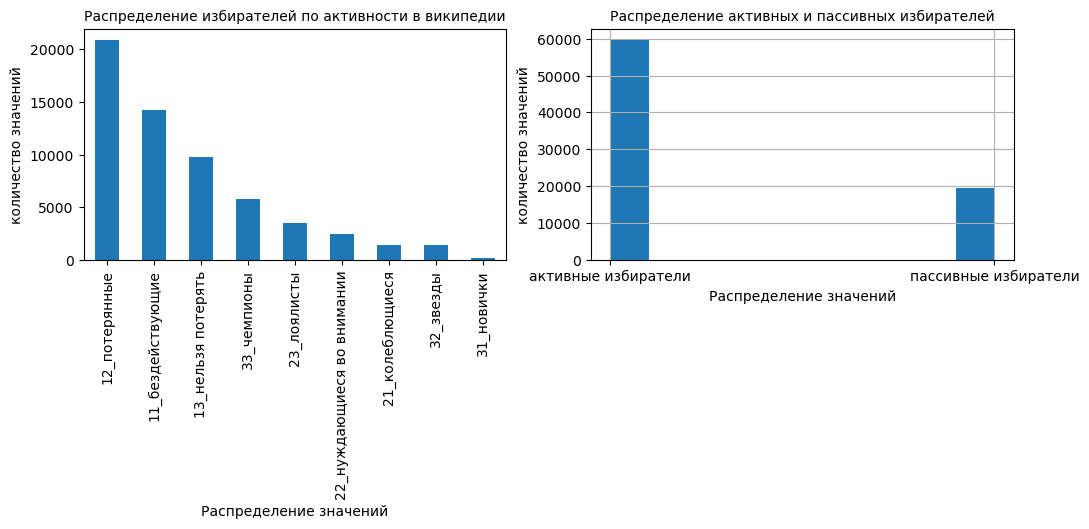

In [179]:
# задаём сетку отрисовки графиков
plt.figure(figsize=(12, 3))
ax1 = plt.subplot(1, 2, 1)
segments_range = votes_agg.groupby('segment')['segment'].count().sort_values(ascending=False).plot(kind='bar', ax=ax1);
segments_range
plt.title('Распределение избирателей по активности в википедии', fontsize=10)
plt.xlabel('Распределение значений')
plt.ylabel('количество значений');

# строим гистограмму распределения столбца 'voters_activity'
ax2 = plt.subplot(1, 2, 2)
votes['voters_activity'].hist(ax=ax2);
plt.title('Распределение активных и пассивных избирателей', fontsize=10)
plt.xlabel('Распределение значений')
plt.ylabel('количество значений');

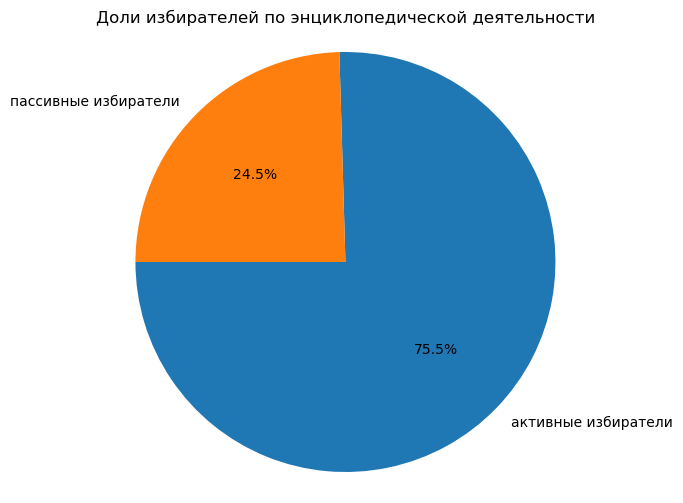

In [180]:
#Строим график соотношения долей активных избирателей к пассивным
plt.figure(figsize=(8, 6))
# Подсчет количества значений активных и пассивных избирателей
voters_activity_count = votes['voters_activity'].value_counts()

# Построение круговой диаграммы
plt.pie(voters_activity_count , labels=voters_activity_count.index, autopct='%1.1f%%', startangle=180)
plt.axis('equal')  # Задает равные масштабы по осям, чтобы получить круг
plt.title('Доли избирателей по энциклопедической деятельности')
plt.show()

Активных избирателей, правящих статьи, а также один раз и более попавших в ТОП-150 в три раза больше, чем неактивных избирателей, которые не попадали в ТОП-150 ни разу. Можно сделать вывод, что пользователи, активно правящие статьи и попавшие в ТОП-150 голосуют более активно.

В разрезе активности избирателей, попавших в ТОП-150 можно сделать вывод, что наибольшая доля голосовавших избирателей принадлежит потерянным пользователям, которые попадали в ТОП-150 давно, но часто. Наименьшая доля голосовавших избирателей принадлежит новичкам, попавшим в ТОП-150.

### 5.3. Анализ деятельности кандидатов.

Проанализируем, есть ли кандидаты среди пользователей и как они себя ведут.

In [181]:
candidate_list = votes['candidate'].unique()
len(candidate_list)

223

Всего в таблице votes 223 кандидата.

In [182]:
stats_candidates = stats.query('user in @candidate_list')
len(stats_candidates['user'].unique())

200

90% кандидатов (200 человек) один раз и более попадали в ТОП-150.

In [183]:
#Посмотрим, как себя ведут кандидаты

In [184]:
stats_candidates

,edits,reverts,log,diff,volume,tot_size,time,speed,user,txt,diff_kb,volume_kb,tot_size_kb,month,year,time_min,speed_in_h,total_activity,segment
0,1589,0,1621,262k,1.1M,39M,95h,34/h,Altes,2007-08-01,262.0,1126.4,39936.0,8,2007,5700,34,3210,12_потерянные
11,1647,0,115,468k,1M,18M,78h,23/h,Butko,2007-08-01,468.0,1024.0,18432.0,8,2007,4680,23,1762,13_нельзя потерять
13,1446,0,151,255k,395k,28M,110h,14/h,Pauk,2007-08-01,255.0,395.0,28672.0,8,2007,6600,14,1597,13_нельзя потерять
27,1048,0,85,266k,665k,23M,79h,14/h,NBS,2007-08-01,266.0,665.0,23552.0,8,2007,4740,14,1133,33_чемпионы
32,1109,0,4,208k,214k,11M,50h,22/h,Сергей Корнилов,2007-08-01,208.0,214.0,11264.0,8,2007,3000,22,1113,13_нельзя потерять
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28927,545,46,109,369k,464k,45M,30h,21/h,Полиционер,2023-08-01,369.0,464.0,46080.0,8,2023,1800,21,700,32_звезды
28928,635,16,64,284k,326k,19M,30h,23/h,Engelberthumperdink,2023-08-01,284.0,326.0,19456.0,8,2023,1800,23,715,33_чемпионы
28931,360,63,278,30k,293k,17M,35h,18/h,Klip game,2023-08-01,30.0,293.0,17408.0,8,2023,2100,18,701,33_чемпионы
28937,341,10,345,51k,166k,11M,21h45,32/h,NBS,2023-08-01,51.0,166.0,11264.0,8,2023,1305,32,696,33_чемпионы


In [185]:
rfm_candidates_agg = stats_candidates.groupby('segment').agg({'total_activity':'mean', 'user':'nunique'})
rfm_candidates_agg.columns = ['Средняя активность', 'Кол-во пользователей']
rfm_candidates_agg = rfm_candidates_agg 
rfm_candidates_agg

,Средняя активность,Кол-во пользователей
segment,,
11_бездействующие,1170.695652,48
12_потерянные,1271.666318,71
13_нельзя потерять,1680.561899,32
21_колеблющиеся,1168.769231,5
22_нуждающиеся во внимании,1148.582734,9
23_лоялисты,1647.118500,17
31_новички,797.000000,1
32_звезды,1199.431034,3
33_чемпионы,1690.926307,14


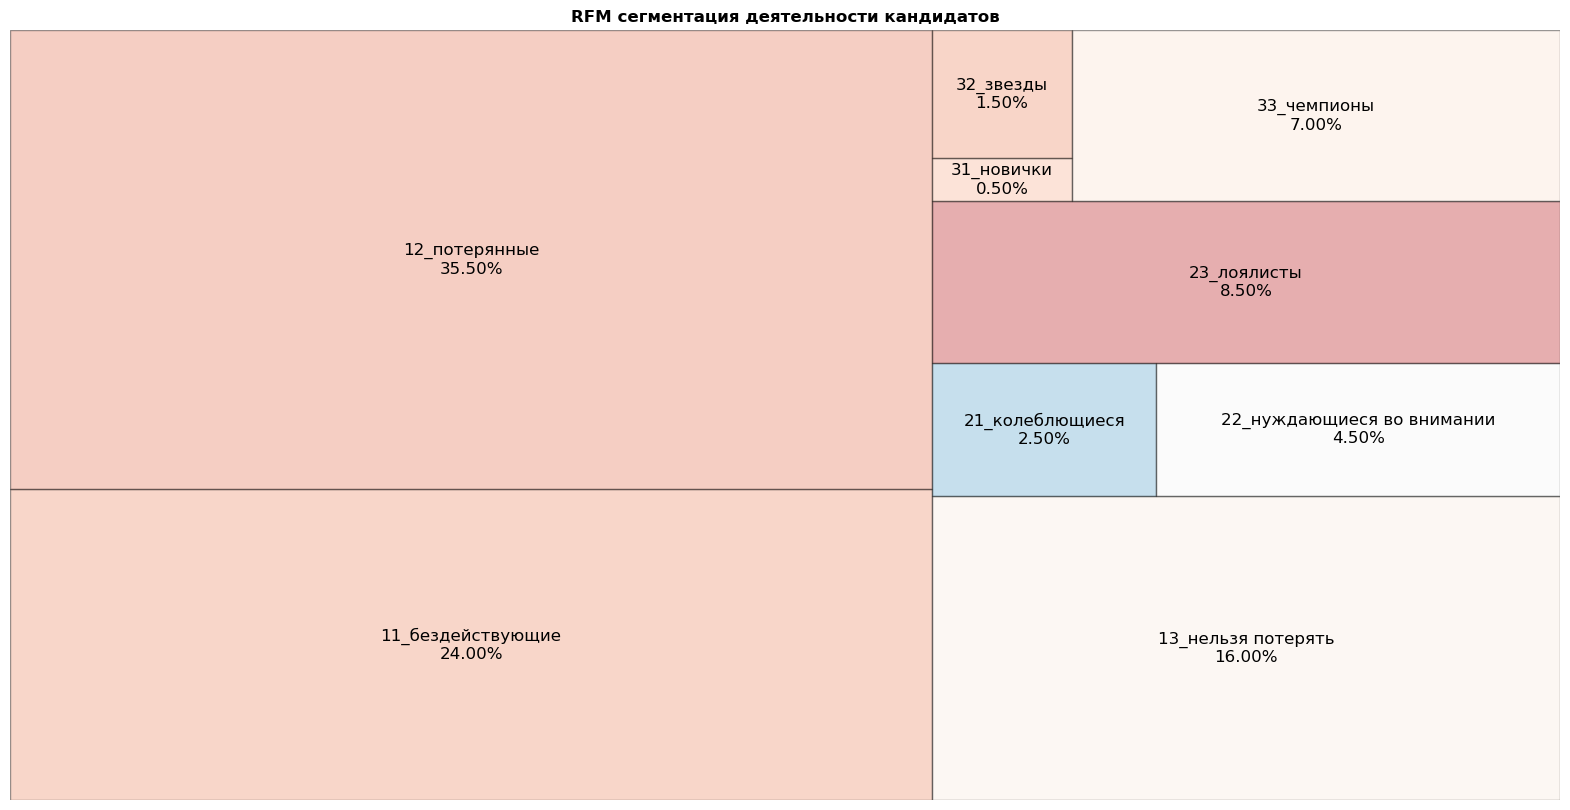

In [186]:
# Рассчитываем проценты для каждого сегмента данных
rfm_candidates_agg['Процент пользователей'] = (rfm_candidates_agg['Кол-во пользователей'] / rfm_candidates_agg['Кол-во пользователей'].sum()) * 100

# Создаем график
fig = plt.gcf()
ax = fig.add_subplot
labels = [f'{label}\n{percent:.2f}%' for label, percent in zip(rfm_candidates_agg.index.values, rfm_candidates_agg['Процент пользователей'])]  # Добавляем проценты к меткам
fig.set_size_inches(20, 10)  # Увеличиваем размер графика
plt.set_cmap('RdBu')

# Увеличиваем размер квадратов и устанавливаем рамки
squarify.plot(sizes=rfm_candidates_agg['Кол-во пользователей'], label=labels, alpha=0.4, text_kwargs={'fontsize': 12}, edgecolor="black")  # Устанавливаем pad
plt.title('RFM сегментация деятельности кандидатов', fontsize=12, fontweight='bold')  # Увеличиваем размер заголовка
plt.axis('off')
plt.show()

Большинство кандидатов на 75.5% - это пользователи, которые в настоящий момент не ведут активную деятельность в википедии, поскольку они попадали в ТОП-150 достаточно давно. Среди кандидатов высокий процент 17%  чемпионов, лоялистов и звезд: пользователей, которые попадают в ТОП-150 в настоящий момент или недавно и регулярно, а также вносят значительный вклад.

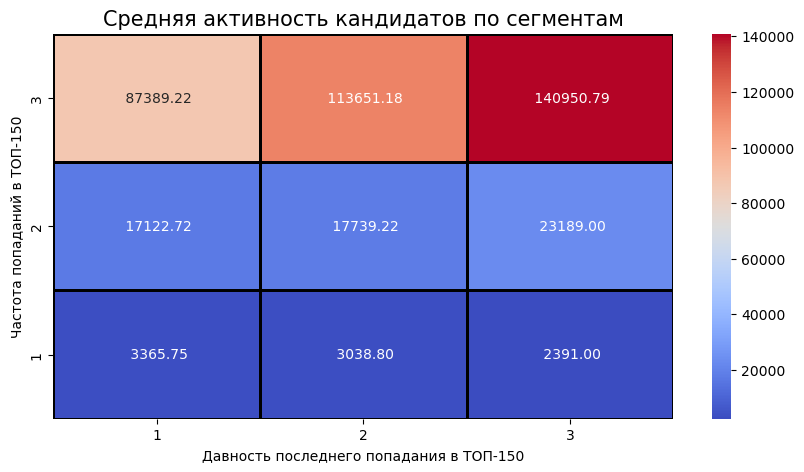

In [187]:
#выведем среднюю активность кандидатов по сегментам.
rfm_table_c = data_process.query('user in @candidate_list').pivot_table(
    index='f', columns='r', values = 'monetary', aggfunc=np.mean).applymap(float)

plt.figure(figsize=(10, 5))

sns.heatmap(rfm_table_c, annot=True, fmt=' .2f', linewidths=1, linecolor='black', cmap='coolwarm',  color='black')

plt.title('Средняя активность кандидатов по сегментам', fontsize=15, color='black')
plt.xlabel('Давность последнего попадания в ТОП-150',  fontsize=10, color='black')
plt.ylabel('Частота попаданий в ТОП-150',  fontsize=10, color='black')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Средняя активность кандидатов по сегментам идентична средней активности всех пользователей по сегментам, однако активность кандидатов - лоялистов значительно выше: 113651 правок и другой деятельности для кандидатов против 93775 для всех пользователей.

### 5.4. Избиратели, голосующие только ЗА или ПРОТИВ.

Посмотрим, есть ли в наших данных избиратели, которые голосуют только ЗА, или только против.

In [188]:
#Находим всех избирателей, которые проголосовали против и внесем их в список votes_against_list
votes_against = votes_agg.query('vote == -1')
votes_against_list = votes_against['voter'].unique()
len(votes_against_list)

1452

In [189]:
#Находим всех избирателей, которые проголосовали ЗА и внесем их в список votes_for_list
votes_for = votes_agg.query('vote == 1')
votes_for_list = votes_for['voter'].unique()
len(votes_for_list)


1828

In [190]:
#исключаем из списка ЗА тех, кто хоть раз голосовал ПРОТИВ и получаем избирателей, голосующих только ЗА
voters_for = votes_for.query('voter not in @votes_against_list')
voters_for['voter'].nunique()

410

In [191]:
#исключаем из списка ПРОТИВ тех, кто хоть раз голосовал ЗА и получаем избирателей, голосующих только ПРОТИВ
voters_against = votes_against.query('voter not in @votes_for_list')
voters_against['voter'].nunique()


34

In [192]:
#Вносим пользователей в соответствующие списки
voters_for_list = voters_for['voter'].unique()
voters_against_list = voters_against['voter'].unique()

In [193]:
#Найдем долю избирателей, голосующих ЗА всех
voters_for['voter'].nunique()/votes['voter'].nunique()*100

22.019334049409238

In [194]:
#Найдем долю избирателей, голосующих ПРОТИВ всех
len(voters_against_list)/votes['voter'].nunique()*100

1.8259935553168638

22%  или 410 избирателей голосут только ЗА, 1.8% или 34 избирателя голосуют против всех. Найдем кандидатов.

In [195]:
votes['voter'].nunique()

1862

In [196]:
voters_for.groupby(['candidate'])['voter'].nunique().reset_index().sort_values(by='voter', ascending=False).head(3)

,candidate,voter
153,Vladimir Solovjev,81
208,Фил Вечеровский,76
207,Томасина,52


У избирателей, голосующих только ЗА есть свои кандидаты-лидеры, это Vladimir Solovjev, за которого проголосовало 81 уникальный избиратель, и Фил Вечеровский, за которого проголосовало 76 уникальных избирателя.

In [197]:
voters_against.groupby(['candidate'])['voter'].nunique().reset_index().sort_values(by='voter', ascending=False).head(3)

,candidate,voter
6,Arsenal.UC,5
69,Кубаноид,4
55,Venzz,4


In [198]:
voters_for_list =  voters_for['voter'].unique()

In [199]:
#Посмотрим распределение по сегментам RF

In [200]:
votes_agg.query('voter in@voters_for_list').groupby('segment')['voter'].nunique()

segment
11_бездействующие             107
12_потерянные                  50
13_нельзя потерять             12
21_колеблющиеся                 9
22_нуждающиеся во внимании      8
23_лоялисты                     3
31_новички                      1
32_звезды                       5
33_чемпионы                     9
Name: voter, dtype: int64

In [201]:
votes_agg.query('voter in@voters_for_list').groupby('voters_activity')['voter'].nunique()

voters_activity
активные избиратели     204
пассивные избиратели    206
Name: voter, dtype: int64

Доли избирателей, голосующих только ЗА поделились пополам между активными избирателями, попадающими в ТОП-150 и пассивынми избирателями

In [202]:
#Найдем самых активных чемпионов, голосующих только ЗА
chempions_for = votes_agg.query(
    'voter in @voters_for_list & segment == "33_чемпионы"'
).groupby(['voter', 'candidate']).size().reset_index(name='count')
chempions_for['voter'].value_counts()

Futball80         19
Clerkon           11
Алексей Густов     5
Vcohen             4
Tpyvvikky          2
AleUst             1
Rartat             1
Андрей Бондарь     1
Андрей М-1212      1
Name: voter, dtype: int64

In [203]:
votes_agg.query('voter in@voters_against_list').groupby('segment')['voter'].nunique()

segment
11_бездействующие     11
12_потерянные          3
13_нельзя потерять     3
21_колеблющиеся        1
Name: voter, dtype: int64

In [204]:
votes_agg.query('voter in@voters_against_list').groupby('voters_activity')['voter'].nunique()

voters_activity
активные избиратели     18
пассивные избиратели    16
Name: voter, dtype: int64

**Вывод:**

- В ходе исследования установлено, что в данных уникальных голосующих пользователей 1862 человека, а кандидатов 223 человека.

- Голосование проходит только девять месяцев из двенадцати: январь, февраль, март, май, июнь, июль, август, ноябрь, декабрь. Голосование не проходит в апреле, сентябре, октябре.

- Данные по голосованию представлены за 16 лет с 2008 год по 2023 год, при этом в таблице отсутствуют данные за 2007 год, при этом таблица stats содержит данные с 2007 года.

- Наименее активный по числу отданных голосов 2008 год: Всего было отдано 1952 голоса, на следующий 2009 год общее число голосов выросло в 3.3 раза. Самый активный по числу отданных голосов оказался 2010 год: всего было отдано 7217 голосов, что в 3.6 раз больше, чем в 2008 году; второй по активности 2022 год: было отдано 6677 голосов. В 2015, с 2017 по 2020, а также в 2022 наблюдается сниженное число отданных голосов в диапазоне 3579 - 4358 голосов. 

- Наиболее активный месяц по числу отданных голосов ноябрь: 24144 голоса; на втором месте по активности отданных голосов находится май: 22223 голоса, наименее активным месяцем по числу отданных голосов является март: всего 36 голосов, что в 670 раз меньше, чем в самом активном месяце. 

- Голосование длится семь суток. Большая часть пользователей голосует в нулевой лайфтайм - в первые сутки. На вторые сутки количество голосов снижается в три раза и идет на постепенное убывание. На пятые сутки количество голосов минимальное. На шестые и седьмые сутки количество голосов постепенно растет, но очень медленно, не превышая общее количество голосов, отданных на третьи сутки. 


 - Общее количество уникальных пользователей, попадавших в ТОП-150 в 2.2 раза превышает общее количество уникальных пользователей, принимавших участие в голосовании и попавших в ТОП-150. Пользователи, которые проявляют активность и попадают в ТОП-150 самых активных пользователей за месяц могут не принимать участие в выборах. Пользователи, проявляющие активность в написании статей не всегда проявляют активность в голосовании.
 
 
 - Избирателей, которые активно правят статьи, а также один раз и более попадали в ТОП-150 в три раза больше, чем неактивных избирателей, которые не попадали в ТОП-150 ни разу: 75% активных избирателей и 25% пассивных избирателей. Можно сделать вывод, что пользователи, активно правящие статьи и попавшие в ТОП-150 голосуют более активно.
 
 - Доля победивших на выборах кандидатов составляет 42%, доля проигравших выборы кандидатов составляет 58%.
 
    В разрезе активности избирателей, попавших в ТОП-150 можно сделать вывод, что наибольшая доля голосовавших избирателей      принадлежит потерянной категории, которые попадали в ТОП-150 давно, но часто. Наименьшая доля голосовавших избирателей принадлежит новичкам, попавшим в ТОП-150.
    
 - Всего в таблице votes 223 кандидата. Чаще всех на выборах побеждал кандидат Vladimir Solovjev: 10 раз. Biathlon и Sir Shurf побеждали на выборах 9 раз. Чаще всех проигрывал выборы Neolexx: 15 раз, на втором месте пользователь с ником Arsenal.UC проиграл выборы 14 раз, на третьем месте Фил Вечеровский, который проиграл выборы 12 раз.
 - 90% кандидатов (200 человек) один раз и более попадали в ТОП-150.
 
 - Большинство кандидатов на 75.5% - это пользователи, которые в настоящий момент не ведут активную деятельность в википедии, поскольку они попадали в ТОП-150 достаточно давно. Среди кандидатов высокий процент 17%  чемпионов, лоялистов и звезд: пользователей, которые попадают в ТОП-150 в настоящий момент или недавно и регулярно, а также вносят значительный вклад.
 
 - Средняя активность кандидатов по сегментам идентична средней активности всех пользователей по сегментам, однако активность кандидатов - лоялистов значительно выше: 113651 правок и другой деятельности для кандидатов против 93775 для всех пользователей
 
 - 22% или 410 избирателей голосут только ЗА, 1.8% или 34 избирателя голосуют против всех. У избирателей, голосующих только ЗА есть свои кандидаты-лидеры, это Vladimir Solovjev, за которого проголосовало 81 уникальный избиратель, и Фил Вечеровский, за которого проголосовало 76 уникальных избирателя. Доли избирателей, голосующих только ЗА  или только ПРОТИВ поделились пополам между активными избирателями, попадающими в ТОП-150 и пассивынми избирателями. 

## 6. Динамика голосования.

Напишем функцию для получения результатов выборов в процентах.

In [205]:
# функция для получения результата выборов на текущую дату выборов
def get_percent(data):
    
    # Создаем пустой итоговый датафрейм, в который будем добавлять результаты
    final_df = pd.DataFrame()
    
    # для каждой компании выборов
    for n in data['n'].unique():
        # создадим сводную таблицу для подсчета результирующего итога на каждую дату выборов
        df = data.query('n == @n').pivot_table(index=['candidate_n', 'vote_date'],
                                               values='vote',
                                               aggfunc=['count', lambda x: (x == 1).sum()]).rename(columns={'count': 'total_voice', '<lambda>': 'positive'})
        df.columns = df.columns.droplevel(1)

        df['total_voice'] = df.sort_values(by=['candidate_n', 'vote_date']).groupby('candidate_n')['total_voice'].cumsum(axis=0)
        df['positive'] = df.groupby('candidate_n')['positive'].cumsum(axis=0)
        df['percent'] = df.apply(lambda x: round(x['positive'] / x['total_voice'] * 100, 2), axis=1)
        df1 = df.pivot_table(index=['candidate_n'], columns='vote_date', values='percent')
        df1 = df1.T.reset_index()
        
        # Добавляем результаты для текущей компании в итоговый датафрейм
        final_df = pd.concat([final_df, df1], ignore_index=True)
    
    return final_df

In [206]:
result = get_percent(votes)

result.columns.name = None
result = result.set_index('vote_date') 
result = result.fillna(0)
result.head(3)

,Agent001_7_0,Alexandrov_7_0,Berserkerus_7_0,Chronicler_7_0,EvgenyGenkin_7_0,Ilya Voyager_7_0,Kaganer_7_0,Kv75_7_0,Pauk_7_0,Solon_7_0,Ukkon_7_0,VasilievVV_7_0,Wulfson_7_0,Александр Сигачёв_7_0,AndyVolykhov_8_0,Carn_8_0,DR_8_0,LEMeZza_8_0,Levg_8_0,Loyna_8_0,Optimizm_8_0,Testus_8_0,VasilievVV_8_0,Victoria_8_0,Wind_8_0,Wulfson_8_0,Yaroslav Blanter_8_0,Котик полосатый_8_0,Сайга_8_0,Сергей Корнилов_8_0,AndyVolykhov_9_0,Blacklake_9_0,Claymore_9_0,Dmitry Rozhkov_9_0,Drbug_9_0,George Shuklin_9_0,Ilya Voyager_9_0,LEMeZza_9_0,NBS_9_0,Ole Førsten_9_0,Optimizm_9_0,Rave_9_0,VPliousnine_9_0,VasilievVV_9_0,Vlsergey_9_0,Wulfson_9_0,А_Крымов_9_0,Воевода_9_0,Фил Вечеровский_9_0,Alogrin_10_0,Artem Korzhimanov_10_0,Daryona_10_0,David_s_kats_10_0,Deinocheirus_10_0,Drbug_10_0,Flagoved_10_0,Idot_10_0,Jackie_10_0,Pessimist2006_10_0,Postoronniy-13_10_0,Testus_10_0,Track13_10_0,Vladimir Solovjev_10_0,Winterheart_10_0,Yaroslav Blanter_10_0,Котик полосатый_10_0,Сержант Кандыба_10_0,Фил Вечеровский_10_0,Abiyoyo_11_0,Altes_11_0,Bkmd_11_0,Blacklake_11_0,Deinocheirus_11_0,Dmitry Rozhkov_11_0,Dodonov_11_0,FlankerFF_11_0,Idot_11_0,Krassotkin_11_0,Levg_11_0,Nikita Kozyrev_11_0,Princenoire_11_0,TenBaseT_11_0,VAP+VYK_11_0,VasilievVV_11_0,Vlsergey_11_0,Wulfson_11_0,Волк_11_0,Фил Вечеровский_11_0,AndyVolykhov_12_0,Artem Korzhimanov_12_0,D_bratchuk_12_0,Dima io_12_0,Glavkom_NN_12_0,Morihei Tsunemori_12_0,NBS_12_0,Optimizm_12_0,Samal_12_0,Schekinov Alexey Victorovich_12_0,VasilievVV_12_0,Vladimir Solovjev_12_0,Андрей Романенко_12_0,Волк_12_0,Рулин_12_0,Сайга_12_0,Фил Вечеровский_12_0,Alogrin_13_0,AndyVolykhov_13_0,Blacklake_13_0,D_bratchuk_13_0,Dima io_13_0,Drbug_13_0,INSAR_13_0,Ilia_13_0,Levg_13_0,Lpi4635_13_0,ShinePhantom_13_0,VasilievVV_13_0,Зелев Андрей_13_0,Юрий Педаченко_13_0,Biathlon_14_0,Cemenarist_14_0,DR_14_0,Generous_14_0,Michgrig_14_0,RussianSpy_14_0,VasilievVV_14_0,Victoria_14_0,Vladimir Solovjev_14_0,Vlsergey_14_0,Wanderer_14_0,Рулин_14_0,Фил Вечеровский_14_0,A_Vajrapani_15_0,Altes_15_0,Biathlon_15_0,Cemenarist_15_0,Dima io_15_0,Ilya Voyager_15_0,Maxtirdatov_15_0,Melirius_15_0,Neolexx_15_0,Pessimist2006_15_0,User234_15_0,User239_15_0,Wanderer_15_0,Wind_15_0,anonim_one_15_0,DonaldDuck_15_5,Drbug_15_5,Ignatus_15_5,Lazyhawk_15_5,Rave_15_5,TenBaseT_15_5,putnik_15_5,A_Vajrapani_16_0,Be nt all_16_0,Deinocheirus_16_0,Malbakov Korkem Shamshievih_16_0,Melirius_16_0,Neolexx_16_0,Rubin16_16_0,Vlsergey_16_0,Волк_16_0,Джекалоп_16_0,Фил Вечеровский_16_0,A_Vajrapani_17_0,DZ_17_0,Dima io_17_0,El-chupanebrej_17_0,Krassotkin_17_0,Messir_17_0,Neolexx_17_0,Vladimir Solovjev_17_0,W2_17_0,Wanderer_17_0,Иван Богданов_17_0,Роман Курносенко_17_0,Фил Вечеровский_17_0,Цезарь Валентиниан_17_0,Carpodacus_18_0,DZ_18_0,D_bratchuk_18_0,Deinocheirus_18_0,Fil211_18_0,Sir Shurf_18_0,Волк_18_0,Роман Курносенко_18_0,Томасина_18_0,Фил Вечеровский_18_0,Цезарь Валентиниан_18_0,Biathlon_18_5,Le Grand Bleu_18_5,Petrov Victor_18_5,TenBaseT_18_5,Vladimir Solovjev_18_5,Егор Ермаков_18_5,Полиционер_18_5,Томасина_18_5,Фил Вечеровский_18_5,A_Vajrapani_19_0,D_bratchuk_19_0,Fedor Babkin_19_0,Fil211_19_0,Vladimir Solovjev_19_0,Волк_19_0,Нирваньчик_19_0,Фил Вечеровский_19_0,Цезарь Валентиниан_19_0,Юлия 70_19_0,A_Vajrapani_19_5,Petrov Victor_19_5,Sir Shurf_19_5,ptQa_19_5,Георгий Суворов_19_5,A_Vajrapani_20_0,Akim Dubrow_20_0,Chronicler_20_0,Glovacki_20_0,Michgrig_20_0,TenBaseT_20_0,UnderTheDome_20_0,Джекалоп_20_0,Фил Вечеровский_20_0,Цезарь Валентиниан_20_0,Юрий Владимирович Л__20_0,Bezik_21_0,Biathlon_21_0,Chronicler_21_0,DZ_21_0,Draa kul_21_0,El-chupanebrej_21_0,Glovacki_21_0,Ivanaivanova_21_0,Kurlovitsch_21_0,Lingveno_21_0,Melirius_21_0,Michgrig_21_0,Mihail Lavrov_21_0,Sir Shurf_21_0,Vyacheslav84_21_0,Apple-Coffee Well_22_0,Be nt all_22_0,Kurlovitsch_22_0,Mihail Lavrov_22_0,Roman645_22_0,Samal_22_0,Saramag_22_0,Vyacheslav84_22_0,Игорь Степанович_22_0,Кубаноид_22_0,Томасина_22_0,Фил Вечеровский_22_0,Apple-Coffee Well_22_5,Ghuron_22_5,Glaue1dk_22_5,Lesless_22_5,User239_22_5,Михаил Семёнов_22_5,Фил Вечеро

С помощью библиотеки `bar_chart_race` отразим динамику голосований по годам. Параметр `n_bars` установим 12, чтоюы отражались 12 кандидатов

In [207]:
#Здесь рабочий код, который закомментирован по причине длительного рендеринга
#def custom_perpendicular_bar(values, ranks):
    #return 66
#bcr.bar_chart_race(
    #df=result,
    #filename='canididates.mp4',
    #orientation='h',
    #sort='desc',
    #n_bars=12,
    #fixed_order=False,
    #fixed_max=True,
    #steps_per_period=50,
    #interpolate_period=False,
   
    #label_bars=True,
    #bar_size=.5,
    #period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
  
  
    #period_fmt='%B %Y',
    #period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      #'s': f'Total Sales: {v.nlargest(6).sum():,.0f}',
                                      #'ha': 'right', 'size': 8, 'family': 'Courier New'},
    #period_length=1500,
    #perpendicular_bar_func= custom_perpendicular_bar,
    #figsize=(12, 6),
    #dpi=300,
    #cmap='dark12',
    #title='Динамика голосований в арбитражный комитет википедии в 2008-2023 гг, % голосов',
    #bar_label_size=7,
    #tick_label_size=7,
    #scale='linear',
    #writer=None,
    #fig=None,
    #bar_kwargs={'alpha': .5},
  
    #filter_column_colors=True)

**Ссылка на видеографик динамики голосования:
https://youtu.be/G3awvmUb8SM**

Состав кандидатов на выборах меняется. Один пользователь может отдать несколько голосов ЗА или ПРОТИВ нескольких кандидатов. Результат подсчета победивших кандидатов предполагает, что 2/3 голосов (или более 66%) за кандидатуру должны быть с отметкой ЗА от общего количества голосов за этого кандидата. 
По результатам можно сделать вывод, что первые сутки голосования предсказывают результат. Перемена прогноза бывает редко, в основном для кандидатов, набравших нужное количество голосов на пороговых значениях. 


## ВЫВОД:

<p></p>

<div style="border:solid green 2px; padding: 20px">  
    
 - **1. Обзор данных.**
    
Произведен предварительный обзор данных. Таблица `stats` содержит 28950 строк и 10 столбцов. Таблица votes содержит 79074 строки и 7 столбцов, пропуски отсутствуют. В некоторых столбцах таблицы `stats` присутствуют пропуски. В столбцах таблицы `stats`: `edits`, `reverts`, `log` присутствуют выбросы.
    
 - **2. Предобработка данных о пользователях.**
    
Выполнена предобработка датасета `stats`. 
    
Выполнена проверка на наличие явных дубликатов: дубликаты отсуствуют.
    
Названия колонок приведены к нижнему регистру, пробелы в названиях заменены на нижнее подчеркивание.
    
В столбцах `reverts` и `log` пропущенные значения заполнены нулями, так как эти столбцы содержат количество правок или действий, пропуски могут означать отсутствие действий или правок.
    
Столбцы `diff`, `volume`, `tot size` в общей доле содержат менее 1% пропусков, которые оставлены без изменений. В этих столбцах удалены пробелы между символами в значениях.
    
Созданы новые столбцы `diff_kb`, `volume_kb` и `tot_size_kb`, содержащие данные столбцов `diff`, `volume`, `tot size`, переведенные в килобайты. Пропущенные значения заменены нулями. Тип данных изменен на `float`.
    
Столбцы `reverts` и `log` приведены к типу данных `int`, поскольку количество отмен правок и количество действий это целые числа. Столбец `txt` приведен к типу данных `datetime`.
    
Созданы столбцы `month` и `year` на основе данных столбца `txt`. Созданные столбцы содержат номер месяца и год.
    
Созданы новые столбцы `time_min` и `speed_in_h` одержащие данные столбцов `time` и `speed`, переведенные в часы и минуты. В столбце `time_min` хранится время, проведенное на сайте онлайн в минутах. В столбце `speed_in_h` хранится количество правок в час.    
    
    
 - **3. Предобработка данных о голосовании.**
    
Выполнена предобработка датасета `votes`. 
    
Явные дубликаты и пропуски отсутствуют.
    
В столбце `candidate` исправлены значения неявных дубликатов, содержащих специальные символы "левого присоединения".
    
Столбец `time` приведен к формату `datetime`. На основе данных столбца создан столбец `vote_date`, содержащий дату голосования в формате `datetime`.
    
На основе данных столбца `lt` создан столбец `lt_day`, содержащий номер суток от начала выборов, где `0 - первый день`, `6 -седьмой день`.
    
На основе данных столбца `datetime` созданы столбцы `month_vote` и `year_vote`, содержащие месяц и год голосования.
    
На основе данных столбцов `candidate` и `n` создан столбец `candidate_n`, содержащий  имя кандидата и номер выборов, в которых кандидат принимал участие.
    
Создан столбец `passed` с результатами выборов: `True` - если кандидат прошел; `False` - если кандидат не прошел.
 
Создан столбец `voters_activity` содержащий категории: активные избиратели, попавшие в ТОП-150 самых активных пользователей за месяц, и пассивные избиратели. 
    
    
    
 - **4. Исследование данных таблицы с пользователями.**
    
Гистограмма количества правок показывает нормальное распределение. Наиболее распространенное количество правок самых активных пользователей, попавших в Топ-150 лежит в диапазоне от 650 до 1250. Среднее значение 1108 правок и медианное значение 865 правок не стремятся друг другу, это означает, что в данных присутствуют выбросы. Минимальное количество правок 0, но такого количества правок мало. Максимальное количество правок 56001. Значения свыше 2300 правок редки, и чем больше таких правок тем их меньше.


Чаще всего пользователи предпочитают не отменять чужие правки в своих статьях. Возможно причина отмен чужих правок связано с вандализмом. Большинство пользователей, отменяющие правки, отменяют их до 6 раз.


Чаще всех попадал в ТОП-150 пользователь с ником Чръный человек: 181 раз. Чаще всего пользователи попадают в ТОП-150 только один раз. Большая часть пользователей попадает в ТОП-150 от 1 до 10 раз. В количественном соотношении половина пользователей попадает в ТОП-150 меньше трех раз, а другая половина пользователей попадает в ТОП-150 больше трех раз. Чем чаще пользователи попадают в ТОП-150, тем таких пользователей меньше.


Минимальное количество правок, внесенное пользователем, попавшим в число самых активных пользователей за месяц, составляет 9 правок в час; максимальная скорость внесения правок: 22620 правки в час. Большая часть пользователей вносит правки со скоростью от 17 до 26 правок в час, при этом половина пользователей вносит менее 20 правок в час, а половина пользователей из ТОП-150 вносит более 20 правок в час.

40% пользователей из десятки тех, кто наиболее часто попадает в ТОП-150 попали в десятку наиболее активных пользователей по количеству правок: Чръный человек, Lasius, Schekinov Alexey Victorovich, Schrike.

Мы можем наблюдать высокую линейную зависимость между столбцами:

  - `diff_kb` и `volume_kb`: при росте разницы между добавленным и удаленным растет общий объем всего, что сделал пользователь.
  - `total_activity` и `edits`: в сумму `total_activity` входят правки `edits`.
    
Мы можем наблюдать среднюю линейную зависимость между столбцами:

  - `edits` и `time_min`: при росте количества правок растет время пребывания на сайте
  - `total_activity` и `time_min`: при росте общей активности растет время пребывания на сайте
    
Проведен RFM - анализ пользователей:
    
  - В качестве `recency` определена дата последнего попадания в ТОП-150 самых активных пользователей.

  - В качестве `frequency` определена частота попаданий в ТОП-150 самых активных пользователей.

  - В качестве `monetary` определено общее количество совершенных пользователем действий total_activity.
    
    
Основными пользователями **57% являются бездействующие пользователи**, попадавшие в ТОП-150 более 9 лет назад в среднем 2 раза и минимальной активностью; и **22.5% потерянных пользователей** (попадавшие в ТОП-150 8 лет назад в среднем 12 раз). **Чемпионы, попадающие регулярно в ТОП-150 в среднем 80 раз составляют 3%**, **звезды 2%**, **лоялисты 2%**, **колеблющиеся почти 4%**. Очень маленький процент **новичков: 0.83%**.
    
    
Основными пользователями 57% являются бездействующие пользователи, попадавшие в ТОП-150 более 9 лет назад в среднем 2 раза и минимальной активностью; и 22.5% потерянных пользователей (попадавшие в ТОП-150 8 лет назад в среднем 12 раз). Чемпионы, попадающие регулярно в ТОП-150 в среднем 80 раз составляют 3%, звезды 2%, лоялисты 2%, колеблющиеся почти 4%. Очень маленький процент новичков: 0.83%.
    
Средняя активность **чемпионов 141648 правок**, средняя активность **лоялистов 93775 правок**; средняя активность **бездействующих пользователей 2059 правок**. Средняя активность **постоянных пользователей 22863 правки**.  **Чем чаще и ближе к настоящему времени пользователи попадают в ТОП-150, тем выше средяя активность.**    
    
    
 - **5. Распределение данных таблицы с выборами.**
    
В ходе исследования установлено, что в данных уникальных голосующих пользователей 1862 человека, а кандидатов 223 человека.

Голосование проходит только девять месяцев из двенадцати: январь, февраль, март, май, июнь, июль, август, ноябрь, декабрь. Голосование не проходит в апреле, сентябре, октябре.

Данные по голосованию представлены за 16 лет с 2008 год по 2023 год, при этом в таблице отсутствуют данные за 2007 год, при этом таблица stats содержит данные с 2007 года.

Наименее активный по числу отданных голосов 2008 год: Всего было отдано 1952 голоса, на следующий 2009 год общее число голосов выросло в 3.3 раза. Самый активный по числу отданных голосов оказался 2010 год: всего было отдано 7217 голосов, что в 3.6 раз больше, чем в 2008 году; второй по активности 2022 год: было отдано 6677 голосов. В 2015, с 2017 по 2020, а также в 2022 наблюдается сниженное число отданных голосов в диапазоне 3579 - 4358 голосов. 

Наиболее активный месяц по числу отданных голосов ноябрь: 24144 голоса; на втором месте по активности отданных голосов находится май: 22223 голоса, наименее активным месяцем по числу отданных голосов является март: всего 36 голосов, что в 670 раз меньше, чем в самом активном месяце. 

Голосование длится семь суток. Большая часть пользователей голосует в нулевой лайфтайм - в первые сутки. На вторые сутки количество голосов снижается в три раза и идет на постепенное убывание. На пятые сутки количество голосов минимальное. На шестые и седьмые сутки количество голосов постепенно растет, но очень медленно, не превышая общее количество голосов, отданных на третьи сутки. 


Общее количество уникальных пользователей, попадавших в ТОП-150 в 2.2 раза превышает общее количество уникальных пользователей, принимавших участие в голосовании и попавших в ТОП-150. Пользователи, которые проявляют активность и попадают в ТОП-150 самых активных пользователей за месяц могут не принимать участие в выборах. Пользователи, проявляющие активность в написании статей не всегда проявляют активность в голосовании.
 
 
Избирателей, которые активно правят статьи, а также один раз и более попадали в ТОП-150 в три раза больше, чем неактивных избирателей, которые не попадали в ТОП-150 ни разу: 75% активных избирателей и 25% пассивных избирателей. Можно сделать вывод, что пользователи, активно правящие статьи и попавшие в ТОП-150 голосуют более активно.
 
Доля победивших на выборах кандидатов составляет 42%, доля проигравших выборы кандидатов составляет 58%.
 
В разрезе активности избирателей, попавших в ТОП-150 можно сделать вывод, что наибольшая доля голосовавших избирателей      принадлежит потерянной категории, которые попадали в ТОП-150 давно, но часто. Наименьшая доля голосовавших избирателей принадлежит новичкам, попавшим в ТОП-150.
    
Всего в таблице votes 223 кандидата. Чаще всех на выборах побеждал кандидат Vladimir Solovjev: 10 раз. Biathlon и Sir Shurf побеждали на выборах 9 раз. Чаще всех проигрывал выборы Neolexx: 15 раз, на втором месте пользователь с ником Arsenal.UC проиграл выборы 14 раз, на третьем месте Фил Вечеровский, который проиграл выборы 12 раз.
    
90% кандидатов (200 человек) один раз и более попадали в ТОП-150.
 
Большинство кандидатов на 75.5% - это пользователи, которые в настоящий момент не ведут активную деятельность в википедии, поскольку они попадали в ТОП-150 достаточно давно. Среди кандидатов высокий процент 17%  чемпионов, лоялистов и звезд: пользователей, которые попадают в ТОП-150 в настоящий момент или недавно и регулярно, а также вносят значительный вклад.
 
Средняя активность кандидатов по сегментам идентична средней активности всех пользователей по сегментам, однако активность кандидатов - лоялистов значительно выше: 113651 правок и другой деятельности для кандидатов против 93775 для всех пользователей
 
22% или 410 избирателей голосут только ЗА, 1.8% или 34 избирателя голосуют против всех. У избирателей, голосующих только ЗА есть свои кандидаты-лидеры, это Vladimir Solovjev, за которого проголосовало 81 уникальный избиратель, и Фил Вечеровский, за которого проголосовало 76 уникальных избирателя. Доли избирателей, голосующих только ЗА  или только ПРОТИВ поделились пополам между активными избирателями, попадающими в ТОП-150 и пассивынми избирателями.     
    
    
    
 - **6. Динамика голосования.**    
    
 Состав кандидатов на выборах меняется. Один пользователь может отдать несколько голосов ЗА или ПРОТИВ нескольких кандидатов. Результат подсчета победивших кандидатов предполагает, что 2/3 голосов (или более 66%) за кандидатуру должны быть с отметкой ЗА от общего количества голосов за этого кандидата. По результатам можно сделать вывод, что первые сутки голосования предсказывают результат. Перемена прогноза бывает редко, в основном для кандидатов, набравших нужное количество голосов на пороговых значениях.   

</div>    